In [6]:
pip install pandas


Looking in indexes: https://pypi.org/simple/
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [2]:
import pandas as pd

# CSV 파일 경로
file_path = 'D:\공공기관 데이터모음\소상공인시장진흥공단_상가(상권)정보_서울_202312.csv'

# CSV 파일 불러오기
data = pd.read_csv(file_path)

# 상위 5줄 미리보기
print(data.head())


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\User\AppData\Local\Temp\ipykernel_26156\3485713741.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


                 상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0  MA010120220805430767     토끼정  NaN        I2       음식      I201   
1  MA010120220805430763     카페숲  NaN        I2       음식      I212   
2  MA010120220805430969     다이앤  NaN        G2       소매      G209   
3  MA010120220805431023    숯불에닭  NaN        I2       음식      I201   
4  MA010120220805431191  맑은에스테틱  NaN        S2    수리·개인      S208   

      상권업종중분류명 상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...  \
0           한식    I20101       백반/한정식   I56111  ...   
1        비알코올     I21201           카페   I56221  ...   
2  섬유·의복·신발 소매    G20902    여성 의류 소매업   G47412  ...   
3           한식    I20110  닭/오리고기 구이/찜   I56111  ...   
4      욕탕·신체관리    S20802       마사지/안마   S96122  ...   

                      건물관리번호     건물명                  도로명주소   구우편번호 신우편번호  \
0  1150010500107740012000001   마커스빌딩      서울특별시 강서구 마곡동로 55  157805  7802   
1  1154510300109290010016890     NaN  서울특별시 금천구 시흥대로40길 129  153860  8647   
2  11140162001077500000

In [3]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import glob
import os

# CSV 파일들이 있는 폴더 경로
folder_path = 'D:/공공기관 데이터모음 경로'

# 해당 경로에서 모든 CSV 파일 목록을 가져옴
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 모든 CSV 파일을 읽어 하나의 DataFrame으로 병합
df_list = []  # 빈 리스트 생성
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8')  # or encoding='cp949' if files are in that encoding
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)

# 병합된 데이터를 Excel 파일로 저장할 경로 설정
output_path = 'D:/공공기관 데이터모음/merged_data.xlsx'  # 저장할 Excel 파일 경로와 이름

# 병합된 데이터를 Excel 파일로 저장
merged_df.to_excel(output_path, index=False, engine='openpyxl')


ValueError: No objects to concatenate

In [8]:
import pandas as pd
import glob
import os

folder_path = 'D:/공공기관 데이터모음 경로'  # CSV 파일들이 있는 폴더 경로 확인
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

df_list = []
for file in csv_files:
    print(f"Processing file: {file}")  # 현재 처리하고 있는 파일명 출력
    try:
        df = pd.read_csv(file, encoding='utf-8')  # 'cp949'로 변경해보세요.
        df_list.append(df)
    except Exception as e:
        print(f"Error reading file {file}: {e}")  # 파일 읽기 오류 출력

if not df_list:  # df_list가 비어있는 경우
    print("No CSV files found or all files failed to read.")
else:
    merged_df = pd.concat(df_list, ignore_index=True)
    output_path = 'D:/공공기관 데이터모음/merged_data.xlsx'
    merged_df.to_excel(output_path, index=False, engine='openpyxl')
    print(f"Data merged and saved to {output_path}")



No CSV files found or all files failed to read.


In [10]:
import pandas as pd
import glob
import os

folder_path = 'D:/공공기관 데이터모음 경로'  # CSV 파일들이 있는 폴더 경로 확인
csv_files = glob.glob(os.path.join(folder_path.replace('\\', '/'), "*.csv"))

df_list = []
for file in csv_files:
    print(f"Processing file: {file}")  # 현재 처리하고 있는 파일명 출력
    try:
        df = pd.read_csv(file, encoding='utf-8')  # 'utf-8'로 시도 (코드 페이지 넘버 65001에 해당)
        df_list.append(df)
    except UnicodeDecodeError:  # UTF-8로 실패하면 CP949로 시도
        try:
            df = pd.read_csv(file, encoding='cp949')
            df_list.append(df)
        except Exception as e:
            print(f"Error reading file {file} with CP949 encoding: {e}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")  # 파일 읽기 오류 출력

if not df_list:  # df_list가 비어있는 경우
    print("No CSV files found or all files failed to read.")
else:
    merged_df = pd.concat(df_list, ignore_index=True)
    output_path = 'D:/공공기관 데이터모음/merged_data.xlsx'
    merged_df.to_excel(output_path, index=False, engine='openpyxl')
    print(f"Data merged and saved to {output_path}")


No CSV files found or all files failed to read.


In [11]:
import pandas as pd
import glob
import os

folder_path = 'D:/공공기관 데이터모음 경로'  # CSV 파일들이 있는 폴더 경로
# "소상공인시장진흥공단_상가(상권)정보_"까지 일치하는 모든 csv 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path.replace('\\', '/'), "소상공인시장진흥공단_상가(상권)정보_*.csv"))

df_list = []
for file in csv_files:
    print(f"Processing file: {file}")  # 현재 처리하고 있는 파일명 출력
    try:
        df = pd.read_csv(file, encoding='utf-8')  # 'utf-8'로 시도
        df_list.append(df)
    except UnicodeDecodeError:  # UTF-8로 실패하면 CP949로 시도
        try:
            df = pd.read_csv(file, encoding='cp949')
            df_list.append(df)
        except Exception as e:
            print(f"Error reading file {file} with CP949 encoding: {e}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")  # 파일 읽기 오류 출력

if not df_list:  # df_list가 비어있는 경우
    print("No CSV files found or all files failed to read.")
else:
    merged_df = pd.concat(df_list, ignore_index=True)
    output_path = 'D:/공공기관 데이터모음/merged_data.xlsx'
    merged_df.to_excel(output_path, index=False, engine='openpyxl')
    print(f"Data merged and saved to {output_path}")


No CSV files found or all files failed to read.


In [13]:
import pandas as pd
import glob
import os

folder_path = 'D:/공공기관 데이터모음 경로'  # CSV 파일들이 있는 폴더 경로
# "소상공인시장진흥공단_상가(상권)정보_"까지 일치하는 모든 csv 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path.replace('\\', '/'), "소상공인시장진흥공단_상가(상권)정보_*.csv"))

df_list = []
for file in csv_files:
    print(f"Processing file: {file}")  # 현재 처리하고 있는 파일명 출력
    try:
        df = pd.read_csv(file, encoding='utf-8')  # 'utf-8'로 시도
        df_list.append(df)
    except UnicodeDecodeError:  # UTF-8로 실패하면 CP949로 시도
        try:
            df = pd.read_csv(file, encoding='cp949')
            df_list.append(df)
        except Exception as e:
            print(f"Error reading file {file} with CP949 encoding: {e}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")  # 파일 읽기 오류 출력

if not df_list:  # df_list가 비어있는 경우
    print("No CSV files found or all files failed to read.")
else:
    merged_df = pd.concat(df_list, ignore_index=True)
    output_path = 'D:/공공기관 데이터모음/merged_data.xlsx'
    merged_df.to_excel(output_path, index=False, engine='openpyxl')
    print(f"Data merged and saved to {output_path}")

No CSV files found or all files failed to read.


In [14]:
import requests

# API 인증 키
api_key = '15880112'

# 요청 URL
url = 'https://api.odcloud.kr/api/15083033/v1/uddi:c7049f5a-d95e-4143-be96-b4d3c16130ee?serviceKey=' + api_key

# 데이터 요청
response = requests.get(url)

# 데이터 확인
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error:", response.status_code)


Error: 400


In [18]:
import requests

# API 인증 키
api_key = 'data-portal-test-key'

# 요청 URL (예시의 수정이 필요할 수 있음)
url = 'https://api.odcloud.kr/api/15083033/v1/uddi:c7049f5a-d95e-4143-be96-b4d3c16130ee?page=1&perPage=10&serviceKey=data-portal-test-key
# 데이터 요청
response = requests.get(url)

# 에러 체크
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error:", response.status_code)


SyntaxError: unterminated string literal (detected at line 7) (3837288077.py, line 7)

In [20]:
pip install pandas matplotlib openpyxl


In [23]:
pip install --upgrade openpyxl


   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------  245.8/250.0 kB ? eta -:--:--
   ---------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [26]:
import pandas as pd
import os

file_path = '파일경로를 여기에 입력하세요'  # 예시 파일 경로

# 파일 확장자에 따라 적절한 pandas 함수를 사용하여 데이터를 읽는 함수
def read_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension in ['.xls', '.xlsx']:
        # 엑셀 파일인 경우
        try:
            return pd.read_excel(file_path, engine='openpyxl')
        except Exception as e:
            print(f"엑셀 파일을 읽는 중 오류가 발생했습니다: {e}")
    elif file_extension == '.csv':
        # CSV 파일인 경우
        return pd.read_csv(file_path)
    elif file_extension == '.html':
        # HTML 파일인 경우
        return pd.read_html(file_path)[0]  # pd.read_html은 리스트를 반환하므로 첫 번째 아이템 선택
    else:
        print("지원하지 않는 파일 형식입니다.")
        return None

# 파일을 읽어서 데이터 프레임에 저장
df = read_file(file_path)

if df is not None:
    try:
        # 여기서 df를 사용하여 필요한 데이터 처리를 진행하세요
        print(df.head())  # 예시로 데이터의 첫 5행을 출력
    except Exception as e:
        print(f"데이터를 처리하는 중 오류가 발생했습니다: {e}")
else:
    print("파일 읽기에 실패했습니다.")


지원하지 않는 파일 형식입니다.
파일 읽기에 실패했습니다.


In [27]:
pip install pandas PyPDF2 pytesseract Pillow


Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import os

file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'  # 예시 파일 경로

# 파일 확장자에 따라 적절한 pandas 함수를 사용하여 데이터를 읽는 함수
# pyxlsb를 사용하여 .xls 파일을 읽기 위한 예제 코드
def read_xls_file_with_pylsb(file_path):
    # pyxlsb를 사용하여 파일 열기
    with pd.ExcelFile(file_path, engine='pyxlsb') as xls:
        # 첫 번째 시트를 DataFrame으로 변환
        df = pd.read_excel(xls, sheet_name=0)
        df = read_xls_file_with_pylsb(file_path)
    return df

def read_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension in ['.xls', '.xlsx']:
        # 엑셀 파일인 경우
        try:
            return pd.read_excel(file_path)
        except ValueError as e:
            print(e)
            # 엔진을 명시적으로 지정해보려고 시도
            try:
                return pd.read_excel(file_path, engine='xlrd')
            except Exception as e:
                print(f"xlrd 엔진으로 시도 중 오류 발생: {e}")
                return pd.read_excel(file_path, engine='openpyxl')
    elif file_extension == '.csv':
        # CSV 파일인 경우
        return pd.read_csv(file_path)
    elif file_extension == '.html':
        # HTML 파일인 경우
        return pd.read_html(file_path)[0]  # pd.read_html은 리스트를 반환하므로 첫 번째 아이템 선택
    else:
        raise ValueError("지원하지 않는 파일 형식입니다.")

# 파일 읽기 시도
try:
    df = read_file(file_path)
    # 여기서 '서비스(대)'와 '요금구분'은 예시로 사용된 열 이름입니다.
    # 실제 열 이름으로 적절히 교체해주세요.
    # 필터링 조건에 맞는 데이터 추출
    filtered_df = df[(df['서비스(대)'] == '기본서비스') & (df['요금구분'] == '대상')]
    print(filtered_df)
except Exception as e:
    print(f"파일을 처리하는 중 오류가 발생했습니다: {e}")


Excel file format cannot be determined, you must specify an engine manually.
xlrd 엔진으로 시도 중 오류 발생: Pandas requires version '2.0.1' or newer of 'xlrd' (version '1.2.0' currently installed).
파일을 처리하는 중 오류가 발생했습니다: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).


In [33]:
pip install pyxlsb


In [35]:
import pandas as pd
import os

file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'  # 예시 파일 경로

# 파일 확장자에 따라 적절한 pandas 함수를 사용하여 데이터를 읽는 함수
def read_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension in ['.xls', '.xlsx']:
        # 엑셀 파일인 경우
        try:
            # pandas의 기본 엔진을 사용하여 엑셀 파일 읽기 시도
            return pd.read_excel(file_path)
        except ValueError as e:
            print(e)
            # 'xlrd' 엔진으로 읽기 시도 (특히 구버전 .xls 파일에 유용)
            try:
                return pd.read_excel(file_path, engine='xlrd')
            except Exception as e:
                print(f"xlrd 엔진으로 시도 중 오류 발생: {e}")
                # 'openpyxl' 엔진으로 읽기 시도 (.xlsx 파일에 적합)
                return pd.read_excel(file_path, engine='openpyxl')
    elif file_extension == '.csv':
        # CSV 파일인 경우
        return pd.read_csv(file_path)
    elif file_extension == '.html':
        # HTML 파일인 경우
        return pd.read_html(file_path)[0]  # pd.read_html은 리스트를 반환하므로 첫 번째 아이템 선택
    else:
        raise ValueError("지원하지 않는 파일 형식입니다.")

# 파일 읽기 시도
try:
    df = read_file(file_path)
    # '서비스(대)'와 '요금구분' 열이 실제 데이터에 존재하는지 확인 후 해당 열을 기준으로 필터링
    # 이 부분은 예시이므로, 실제 열 이름으로 교체해야 함
    # filtered_df = df[(df['서비스(대)'] == '기본서비스') & (df['요금구분'] == '대상')]
    # print(filtered_df)
except Exception as e:
    print(f"파일을 처리하는 중 오류가 발생했습니다: {e}")


Excel file format cannot be determined, you must specify an engine manually.
xlrd 엔진으로 시도 중 오류 발생: Pandas requires version '2.0.1' or newer of 'xlrd' (version '1.2.0' currently installed).
파일을 처리하는 중 오류가 발생했습니다: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).


In [42]:
!pip install --upgrade openpyxl





In [43]:
!pip install --upgrade xlrd


Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [51]:
import pandas as pd
import os
from openpyxl import Workbook

# 빈 .xlsx 파일 생성 함수
def create_empty_xlsx(file_path):
    wb = Workbook()
    ws = wb.active
    wb.save(file_path)
    print(f"{file_path}에 빈 .xlsx 파일이 생성되었습니다.")

# 파일 경로
empty_file_path = 'D:\\일일실적대시보드작업\\빈_파일.xlsx'
file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'  # 수정된 파일 경로

# 빈 .xlsx 파일 생성
create_empty_xlsx(empty_file_path)

# 파일 확장자에 따라 적절한 pandas 함수를 사용하여 데이터를 읽는 함수
def read_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension in ['.xls', '.xlsx']:
        try:
            return pd.read_excel(file_path)
        except ValueError as e:
            print(e)
            try:
                return pd.read_excel(file_path, engine='xlrd')
            except Exception as e:
                print(f"xlrd 엔진으로 시도 중 오류 발생: {e}")
                return pd.read_excel(file_path, engine='openpyxl')
    elif file_extension == '.csv':
        return pd.read_csv(file_path)
    elif file_extension == '.html':
        return pd.read_html(file_path)[0]
    else:
        raise ValueError("지원하지 않는 파일 형식입니다.")

# 파일 읽기 시도
try:
    df = read_file(file_path)
    if '서비스(대)' in df.columns and '요금구분' in df.columns:
        filtered_df = df[(df['서비스(대)'] == '기본서비스') & (df['요금구분'] == '대상')]
        print(filtered_df)
    else:
        print("필요한 열이 데이터에 존재하지 않습니다.")
except Exception as e:
    print(f"파일을 처리하는 중 오류가 발생했습니다: {e}")


D:\일일실적대시보드작업\빈_파일.xlsx에 빈 .xlsx 파일이 생성되었습니다.
Excel file format cannot be determined, you must specify an engine manually.
xlrd 엔진으로 시도 중 오류 발생: Pandas requires version '2.0.1' or newer of 'xlrd' (version '1.2.0' currently installed).
파일을 처리하는 중 오류가 발생했습니다: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).


In [47]:
D:\일일실적대시보드작업\빈_파일.xlsx에 빈 .xlsx 파일이 생성되었습니다.
Excel file format cannot be determined, you must specify an engine manually.
xlrd 엔진으로 시도 중 오류 발생: Pandas requires version '2.0.1' or newer of 'xlrd' (version '1.2.0' currently installed).
파일을 처리하는 중 오류가 발생했습니다: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

SyntaxError: unexpected character after line continuation character (260069083.py, line 1)

In [48]:
!pip install --upgrade xlrd
!pip install --upgrade openpyxl


In [52]:
import os

# 파일 경로 설정
file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'

# 파일 열기
os.startfile(file_path)


In [53]:
import pyautogui
import time
import os

# 파일 경로 설정
file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'

# 파일 열기
os.startfile(file_path)

# 경고창이 나타날 것으로 예상되는 시간을 기다립니다. (예: 5초)
time.sleep(5)

# '예(Y)' 버튼의 위치를 찾아 클릭합니다. (x, y는 실제 화면에서 '예' 버튼의 위치에 따라 달라질 수 있습니다.)
# 이 좌표는 실제 화면에 맞게 조정해야 합니다.
pyautogui.click(x=500, y=500)


ModuleNotFoundError: No module named 'pyautogui'

In [54]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [55]:
import xlrd
import csv

def xls_to_csv(xls_file_path, csv_file_path):
    # 엑셀 파일을 열기
    workbook = xlrd.open_workbook(xls_file_path)
    # 첫 번째 시트를 선택
    sheet = workbook.sheet_by_index(0)
    
    # CSV 파일 생성
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        
        # 엑셀 파일의 각 행을 순회하며 CSV 파일에 쓰기
        for row_num in range(sheet.nrows):
            writer.writerow(sheet.row_values(row_num))

# 파일 경로 설정
xls_file_path = 'D:\\일일실적대시보드작업\\20240313_유지.xls.xls'
csv_file_path = 'D:\\일일실적대시보드작업\\20240313_유지.csv'

# 함수 호출
xls_to_csv(xls_file_path, csv_file_path)


XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'SCDSA004'

In [56]:
pip install pandas matplotlib openpyxl


In [57]:
import requests
import json

# API URL 및 인증키
url = 'https://api.odcloud.kr/api/nts-businessman/v1/validate?serviceKey=plus3867!!'

# 요청할 데이터
data = {
  "businesses": [
    {
      "b_no": "0000000000",
      "start_dt": "20000101",
      "p_nm": "장지호",
      "p_nm2": "장지호",
      "b_nm": "(주)케이티텔레캅",
      "corp_no": "1138609204",
      "b_sector": "",
      "b_type": "",
      "b_adr": ""
    }
  ]
}

# 요청 헤더 설정
headers = {
    'accept': '*/*',
    'Content-Type': '*/*'
}

# POST 요청
response = requests.post(url, headers=headers, data=json.dumps(data))

# 응답 출력
if response.status_code == 200:
    print("성공적으로 요청되었습니다.")
    print(response.json())
else:
    print("요청에 실패하였습니다. 상태 코드:", response.status_code)


요청에 실패하였습니다. 상태 코드: 400


In [58]:
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>


SyntaxError: invalid syntax (4174805320.py, line 1)

In [66]:
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>상태 조회 샘플</title>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
<script>
$(document).ready(function() {
    var data = {
        "b_no": ["1138609204"] // 실제 조회하고 싶은 사업자번호로 변경
    };

    $.ajax({
        url: "https://api.odcloud.kr/api/nts-businessman/v1/validate?serviceKey=plus3867!!", // 실제 serviceKey로 변경
        type: "POST",
        data: JSON.stringify(data), // 데이터를 JSON 문자열로 변환
        dataType: "JSON",
        contentType: "application/json",
        accept: "application/json",
        success: function(result) {
            console.log(result); // 성공 시 결과 출력
        },
        error: function(xhr, status, error) {
            console.log(xhr.responseText); // 오류 시 오류 메시지 출력
        }
    });
});
</script>
</head>
<body>
</body>
</html>


SyntaxError: invalid syntax (1354248028.py, line 1)

In [67]:
<rdf:RDF xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:dct="http://purl.org/dc/terms/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:dcat="http://www.w3.org/ns/dcat#" xmlns:vcard="http://www.w3.org/2006/vcard/ns#">
<dcat:Catalog>
<dcat:dataset>
<dcat:Dataset>
<dcat:contactPoint>
<vcard:Individual>
<vcard:hasTelephone rdf:resource="tel:0423637547"/>
</vcard:Individual>
</dcat:contactPoint>
<dct:description xml:lang="kr">
영업 중인 전국 상가업소 데이터를 제공합니다.
<br/>
(상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)
<br/>
<br/>
[데이터 변경 안내]
<br/>
<br/>
1. 상권업종분류 : 표준산업분류 기반 업종분류 개편(837개 -> 247개)
<br/>
<br/>
2. 표준산업분류 : 9차→10차
<br/>
<br/>
3. 상가업소번호 : 상가업소번호를 새롭게 생성하여 과거 데이터와 연계 불가
<br/>
<br/>
자세한 사항은 상권정보시스템 공지사항에서 확인하시기 바랍니다.
<br/>
https://sg.sbiz.or.kr/godo/noticeInfo/announcementView.sg?id=5158&page=1
</dct:description>
<dct:description xml:lang="en">It provides data on commercial businesses in operation nationwide. (Company name, industry code, industry name, lot number address, road name address, longitude, latitude, etc.) [Data change information] 1. Commercial sector industry classification: Industry classification reorganization based on standard industry classification (837 -> 247) 2. Standard industry classification : 9th → 10th 3. Commercial business number: Create a new commercial business number and cannot be linked with past data. For details, please check the commercial district information system notice. https://sg.sbiz.or.kr/godo/noticeInfo/announcementView.sg?id=5158&amp;page=1</dct:description>
<dct:title xml:lang="kr">소상공인시장진흥공단_상가(상권)정보</dct:title>
<dct:title xml:lang="en">Store Location Data</dct:title>
<dct:issued rdf:datatype="http://www.w3.org/2001/XMLSchema#date">2021-04-28 17:38:56.000</dct:issued>
<dct:modified rdf:datatype="http://www.w3.org/2001/XMLSchema#date">2021-06-15 09:16:18.000</dct:modified>
<dct:publisher>
<foaf:Organization>
<foaf:name>소상공인시장진흥공단</foaf:name>
</foaf:Organization>
</dct:publisher>
<dcat:theme>산업고용</dcat:theme>
<dcat:keyword xml:lang="kr">상가업소 ,소상공인 ,상권정보</dcat:keyword>
<dcat:keyword xml:lang="en">shopping mall,small business,Store Location Information</dcat:keyword>
<dct:rights>이용허락범위 제한 없음</dct:rights>
<dct:accrualPeriodicity>분기</dct:accrualPeriodicity>
<dcat:distribution>
<dcat:Distribution>
<dct:accessURL/>
<dcat:byteSize>268237127</dcat:byteSize>
<dcat:downloadURL>https://www.data.go.kr/cmm/cmm/fileDownload.do?fileDetailSn=1&atchFileId=FILE_000000002395525&dataNm=%EC%86%8C%EC%83%81%EA%B3%B5%EC%9D%B8%EC%8B%9C%EC%9E%A5%EC%A7%84%ED%9D%A5%EA%B3%B5%EB%8B%A8_%EC%83%81%EA%B0%80%28%EC%83%81%EA%B6%8C%29%EC%A0%95%EB%B3%B4_20210331</dcat:downloadURL>
<dcat:mediaType>텍스트</dcat:mediaType>
<dcat:description/>
<dcat:format>zip</dcat:format>
<dct:issued rdf:datatype="http://www.w3.org/2001/XMLSchema#date">2021-06-02 15:15:29.000</dct:issued>
<dcat:title>소상공인시장진흥공단_상가(상권)정보_20210331</dcat:title>
</dcat:Distribution>
</dcat:distribution>
</dcat:Dataset>
</dcat:dataset>
</dcat:Catalog>
</rdf:RDF>

SyntaxError: invalid decimal literal (2494703400.py, line 19)

In [68]:
Sub 해지조건값가져오기및저장()
    Dim ws As Worksheet
    Set ws = ThisWorkbook.Sheets("Sheet1") '적절한 시트 이름으로 변경하세요
    
    Dim 경로 As String
    Dim 조건열 As Range
    Dim 저장파일명 As String
    Dim 전체저장경로 As String
    
    경로 = "D:\dbtest\0228_해지 적용" '제공해 주신 경로
    Set 조건열 = ws.Range("B1:B10") 'B1부터 B10까지가 조건값이라고 가정합니다. 필요에 따라 변경하세요.
    
    '조건열 값들 출력 (실제로는 이 과정을 원하는 작업에 맞게 조정해야 합니다.)
    Dim 셀 As Range
    For Each 셀 In 조건열
        Debug.Print 셀.Value
    Next 셀
    
    저장파일명 = "\0228_해지 적용_해지 조건값 가져오기 vba.xlsx" '파일명 설정
    전체저장경로 = 경로 & 저장파일명 '경로와 파일명 합치기
    
    '저장 경로와 파일명 설정에 따른 저장
    ThisWorkbook.SaveAs Filename:=전체저장경로
End Sub


SyntaxError: unterminated string literal (detected at line 3) (1698697407.py, line 3)

In [81]:
import openpyxl

# 새 워크북 생성
wb = openpyxl.Workbook()
sheet = wb.active

# 헤더 추가
sheet['A1'] = '주소'
sheet['B1'] = '설명'
sheet['C1'] = '네이버 지도 보기'

# 테스트용 주소 데이터 추가
addresses = [
    '서울특별시 종로구 세종로',
    '서울특별시 중구 명동',
    '서울특별시 서초구 서초동',
    '서울특별시 강남구 역삼동'
]

for i, address in enumerate(addresses, start=2): # 2행부터 시작
    sheet[f'A{i}'] = address
    sheet[f'B{i}'] = f'테스트 데이터 {i-1}'

# 엑셀 파일 저장
filename = 'sample.xlsx'
wb.save(filename)

print(f'{filename} 파일이 생성되었습니다. 테스트 데이터가 포함되어 있으니, 이제 하이퍼링크 추가 스크립트를 실행해보세요.')


sample.xlsx 파일이 생성되었습니다. 테스트 데이터가 포함되어 있으니, 이제 하이퍼링크 추가 스크립트를 실행해보세요.


In [82]:
import openpyxl
from urllib.parse import quote

# 엑셀 파일 로드
filename = 'sample.xlsx'
wb = openpyxl.load_workbook(filename)
sheet = wb.active

# A열의 주소에 따라 C열에 네이버 지도 링크 추가
for row in range(2, sheet.max_row + 1):  # 2행부터 시작
    address = sheet[f'A{row}'].value
    if address:  # 주소가 비어있지 않은 경우
        # 네이버 지도 검색 URL 생성, 주소를 URL 인코딩
        naver_map_url = f"https://map.naver.com/v5/search/{quote(address)}"
        # 하이퍼링크를 C열에 추가
        sheet.cell(row=row, column=3).hyperlink = naver_map_url
        sheet.cell(row=row, column=3).value = '네이버 지도 보기'
        # 하이퍼링크 스타일 적용 (선택적)
        sheet.cell(row=row, column=3).style = 'Hyperlink'

# 변경사항 저장
wb.save(filename)


In [84]:
import openpyxl
import os

# 직접 지정한 경로 설정
file_path = 'C:\\Users\\User\\Desktop\\네이버주소 하이퍼링크.xlsx'

# 엑셀 파일 열기 (없으면 새로 생성)
if not os.path.exists(file_path):
    wb = openpyxl.Workbook()
else:
    wb = openpyxl.load_workbook(file_path)

sheet = wb.active

# 예시 데이터 입력 (실제 사용 시 삭제 또는 수정)
# sheet['A1'] = '지번 주소'
# sheet['A2'] = '서울특별시 강남구 역삼동'

for row in range(2, sheet.max_row + 1):
    address = sheet[f'A{row}'].value
    if address:  # 주소가 비어있지 않은 경우에만 실행
        naver_map_url = f'https://map.naver.com/v5/search/{address}'
        sheet[f'B{row}'].hyperlink = naver_map_url
        sheet[f'B{row}'].value = address
        sheet[f'B{row}'].style = 'Hyperlink'

# 변경사항 저장
wb.save(file_path)

print(f"'{file_path}'에 파일이 저장되었습니다.")


BadZipFile: File is not a zip file

In [85]:
import pandas as pd
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Step 1: xlsx 파일을 CSV로 저장
def xlsx_to_csv(source_file, target_file):
    df = pd.read_excel(source_file)
    df.to_csv(target_file, index=False)

# Step 2: CSV 파일에 하이퍼링크 추가 (예시는 모든 데이터에 대해 동일한 링크 추가)
def add_hyperlinks_to_csv(source_file, target_file):
    df = pd.read_csv(source_file)
    # 여기서는 'Link'라는 새 칼럼에 모든 행에 대해 동일한 하이퍼링크를 추가합니다.
    # 실제 사용 사례에 맞게 조정하세요.
    df['Link'] = df.apply(lambda row: f'=HYPERLINK("http://example.com", "Link")', axis=1)
    df.to_csv(target_file, index=False)

# Step 3: 하이퍼링크가 포함된 CSV 파일을 다시 xlsx로 저장
def csv_to_xlsx_with_hyperlinks(source_file, target_file):
    df = pd.read_csv(source_file)
    wb = Workbook()
    ws = wb.active
    for r in dataframe_to_rows(df, index=False, header=True):
        ws.append(r)
    wb.save(target_file)

# 파일 경로 설정
source_xlsx = 'example.xlsx'
intermediate_csv = 'output.csv'
final_csv_with_links = 'output_with_links.csv'
final_xlsx = 'final_output.xlsx'

# 함수 실행
xlsx_to_csv(source_xlsx, intermediate_csv)
add_hyperlinks_to_csv(intermediate_csv, final_csv_with_links)
csv_to_xlsx_with_hyperlinks(final_csv_with_links, final_xlsx)

print("작업 완료! 하이퍼링크가 포함된 xlsx 파일이 생성되었습니다.")


FileNotFoundError: [Errno 2] No such file or directory: 'example.xlsx'

In [86]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

def add_hyperlinks_to_excel(file_path, link_column, start_row=2):
    # 파일 로드
    wb = load_workbook(filename=file_path)
    ws = wb.active  # 현재 활성화된 워크시트 사용

    # 하이퍼링크 추가
    for row in range(start_row, ws.max_row + 1):
        cell = ws[f'{get_column_letter(link_column)}{row}']
        # 예시 링크와 표시될 텍스트. 실제 링크와 텍스트로 교체 필요
        cell.value = f'=HYPERLINK("http://example.com", "Visit Example")'

    # 파일 저장
    wb.save(filename=file_path)

# 사용 예시
file_path = 'D:\공공기관 데이터모음\디비리아자료.xlsx'  # 실제 파일 경로로 교체 필요
link_column = 3  # 하이퍼링크를 추가할 열 번호 (예: C열이면 3)
add_hyperlinks_to_excel(file_path, link_column)

print("하이퍼링크 추가 작업 완료!")


FileNotFoundError: [Errno 2] No such file or directory: 'your_excel_file.xlsx'

In [90]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

def add_hyperlinks_to_xlsx(file_path, column, hyperlink):
    # 파일을 불러옵니다.
    wb = load_workbook(filename=file_path)
    ws = wb.active

    # 지정한 열에 하이퍼링크 추가
    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작합니다(헤더 가정).
        cell_value = ws[f'{column}{row}'].value
        if cell_value is not None:
            # 하이퍼링크를 추가합니다. 여기서는 'http://www.naver.com'을 모든 셀에 적용합니다.
            ws[f'{column}{row}'].hyperlink = hyperlink
            ws[f'{column}{row}'].value = cell_value  # 원래의 셀 값으로 다시 설정
            ws[f'{column}{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    # 파일 저장
    wb.save(filename=file_path)

# 파일 경로, 수정할 열, 추가할 하이퍼링크 설정
'file_path = 'D:\공공기관 데이터모음\디비리아자료.xlsx'
column = 'A'  # 예: 'A' 열에 하이퍼링크를 추가합니다.
hyperlink = 'http://www.naver.com'

# 함수 실행
add_hyperlinks_to_xlsx(file_path, column, hyperlink)

print("하이퍼링크 추가 작업 완료!")


SyntaxError: invalid syntax (2871699223.py, line 22)

In [92]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

def add_hyperlinks_to_xlsx(file_path, column, hyperlink):
    # 파일을 불러옵니다.
    wb = load_workbook(filename=file_path)
    ws = wb.active

    # 지정한 열에 하이퍼링크 추가
    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작합니다(헤더 가정).
        cell_value = ws[f'{column}{row}'].value
        if cell_value is not None:
            # 하이퍼링크를 추가합니다.
            ws[f'{column}{row}'].hyperlink = hyperlink
            ws[f'{column}{row}'].value = cell_value  # 원래의 셀 값으로 다시 설정
            ws[f'{column}{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    # 파일 저장
    wb.save(filename=file_path)

# 파일 경로, 수정할 열, 추가할 하이퍼링크 설정
file_path = 'D:\\공공기관 데이터모음\\권문석.xlsx'
column = 'c'  # 예: 'A' 열에 하이퍼링크를 추가합니다.
hyperlink = 'http://www.naver.com'

# 함수 실행
add_hyperlinks_to_xlsx(file_path, column, hyperlink)

print("하이퍼링크 추가 작업 완료!")


하이퍼링크 추가 작업 완료!


In [96]:
from openpyxl import load_workbook

def add_naver_map_hyperlinks(file_path):
    wb = load_workbook(filename=file_path)
    ws = wb.active

    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작
        address = ws[f'b{row}'].value  # A열에서 주소 가져오기
        if address is not None:
            # 네이버 지도 검색 URL 생성
            map_url = f"https://map.naver.com/v5/search/{address}"
            # B열에 하이퍼링크 적용
            ws[f'c{row}'].hyperlink = map_url
            ws[f'c{row}'].value = "네이버 지도에서 보기"  # 표시할 텍스트
            ws[f'c{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    wb.save(filename=file_path)  # 변경 사항 저장

file_path = 'D:\\공공기관 데이터모음\\권문석3.xlsx'  # 예: 'D:\\공공기관 데이터모음\\디비리아자료.xlsx'

add_naver_map_hyperlinks(file_path)  # 함수 실행

print("네이버 지도 하이퍼링크 추가 작업 완료!")

네이버 지도 하이퍼링크 추가 작업 완료!


In [99]:
from openpyxl import load_workbook

def add_naver_map_hyperlinks(file_path):
    wb = load_workbook(filename=file_path)
    ws = wb.active

    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작
        address = ws[f'b{row}'].value  # A열에서 주소 가져오기
        if address is not None:
            # 네이버 지도 검색 URL 생성
            map_url = f"https://map.naver.com/v5/search/{address}"
            # B열에 하이퍼링크 적용
            ws[f'c{row}'].hyperlink = map_url
            ws[f'c{row}'].value = "네이버 지도에서 보기"  # 표시할 텍스트
            ws[f'c{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    wb.save(filename=file_path)  # 변경 사항 저장

file_path = 'D:\\공공기관 데이터모음\\권대호지도.xlsx'  # 예: 'D:\\공공기관 데이터모음\\디비리아자료.xlsx'

add_naver_map_hyperlinks(file_path)  # 함수 실행

print("네이버 지도 하이퍼링크 추가 작업 완료!")

네이버 지도 하이퍼링크 추가 작업 완료!


In [101]:
from flask import Flask, request, jsonify
import sqlite3
import matplotlib.pyplot as plt

app = Flask(__name__)

# 데이터베이스 연결 및 테이블 생성
conn = sqlite3.connect('management.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS overdue (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    billing_number TEXT,
                    customer_name TEXT,
                    company TEXT,
                    address TEXT,
                    amount INTEGER
                )''')
conn.commit()
conn.close()

@app.route('/overdue', methods=['POST'])
def add_overdue():
    data = request.get_json()
    conn = sqlite3.connect('management.db')
    cursor = conn.cursor()
    cursor.execute('INSERT INTO overdue (billing_number, customer_name, company, address, amount) VALUES (?, ?, ?, ?, ?)',
                   (data['billing_number'], data['customer_name'], data['company'], data['address'], data['amount']))
    conn.commit()
    conn.close()
    return 'Overdue information added successfully'

@app.route('/overdue', methods=['GET'])
def get_overdue():
    conn = sqlite3.connect('management.db')
    cursor = conn.cursor()
    cursor.execute('SELECT billing_number, amount FROM overdue ORDER BY amount DESC')
    rows = cursor.fetchall()
    conn.close()
   
    # 시각화
    billing_numbers = [row[0] for row in rows]
    amounts = [row[1] for row in rows]
    plt.bar(billing_numbers, amounts)
    plt.xlabel('Billing Number')
    plt.ylabel('Amount')
    plt.title('Overdue Amount')
    plt.xticks(rotation=45)
    plt.show()
   
    return jsonify(rows)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [105]:
import pandas as pd
import os
import glob

# CSV 파일들이 있는 경로를 지정하세요.
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 경로에서 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 모든 CSV 파일을 읽어와 하나의 DataFrame으로 합칩니다.
all_data = []
for file in csv_files:
    df = pd.read_csv(file, encoding='EUC-KR')  # 'CP949' 대신 'EUC-KR' 사용
    all_data.append(df)


# 모든 데이터를 하나의 DataFrame으로 합칩니다.
merged_data = pd.concat(all_data, ignore_index=True)

# 결과를 엑셀 파일로 저장합니다.
output_path = os.path.join(folder_path, "서울시.xlsx")
merged_data.to_excel(output_path, index=False)

print("작업 완료! 파일이 저장되었습니다:", output_path)


UnicodeDecodeError: 'euc_kr' codec can't decode byte 0x93 in position 154370: illegal multibyte sequence

In [106]:
import pandas as pd
import os
import glob

# CSV 파일이 위치한 폴더 경로
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
all_data = []

for file in csv_files:
    try:
        # 'CP949' 인코딩으로 파일을 읽어옵니다.
        df = pd.read_csv(file, encoding='CP949')
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 파일 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 모든 데이터를 하나의 DataFrame으로 병합합니다.
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # 병합된 데이터를 Excel 파일로 저장합니다.
    output_filename = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\서울시.xlsx'
    combined_df.to_excel(output_filename, index=False)
    print(f"모든 데이터가 성공적으로 병합되어 '{output_filename}'에 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (11,46) have mixed types. Specify dtype option on import or set 

D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_08_26_04_P_통신판매업.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: Error tokenizing data. C error: Expected 33 fields in line 274077, saw 34



C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1690863321.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_data, ignore_index=True)


ValueError: This sheet is too large! Your sheet size is: 1782513, 421 Max sheet size is: 1048576, 16384

In [107]:
import pandas as pd
import os
import glob

# CSV 파일이 위치한 폴더 경로
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 공통 열을 찾기 위한 초기 설정
common_columns = None
all_data = []

for file in csv_files:
    try:
        df = pd.read_csv(file, encoding='CP949', error_bad_lines=False, warn_bad_lines=True)
        
        # 첫 번째 파일을 읽을 때, 공통 열 설정
        if common_columns is None:
            common_columns = df.columns
        else:
            # 이전 파일들과 공통된 열만 남깁니다.
            common_columns = common_columns.intersection(df.columns)
            
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 파일 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 공통 열을 가진 데이터만 병합합니다.
if all_data:
    combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)

    # 병합된 데이터를 두 부분으로 나누어 저장합니다.
    half = len(combined_data) // 2
    combined_data.iloc[:half].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시1.xlsx', index=False)
    combined_data.iloc[half:].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시2.xlsx', index=False)
    print(f"데이터가 성공적으로 병합되어 '서울시1.xlsx' 및 '서울시2.xlsx'에 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_01_P_병원.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword argument 'error_bad_lines'
D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_02_P_의원.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword argument 'error_bad_lines'
D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_03_P_부속의료기관.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword argument 'error_bad_lines'
D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_04_P_산후조리업.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword argument 'error_bad_lines'
D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_05_P_안전상비의약품판매업소.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword argument 'error_bad_lines'
D:\공공기관 데이터모음\인허가자료\서울,경기,인천\6110000_CSV (2)\6110000_서울특별시_01_01_06_P_약국.csv 파일 처리 중 예상치 못한 에러가 발생했습니다: read_csv() got an unexpected keyword arg

In [108]:
import pandas as pd
import os
import glob

# CSV 파일이 위치한 폴더 경로
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 공통 열을 찾기 위한 초기 설정
common_columns = None
all_data = []

for file in csv_files:
    try:
        df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip')
        
        # 첫 번째 파일을 읽을 때, 공통 열 설정
        if common_columns is None:
            common_columns = df.columns
        else:
            # 이전 파일들과 공통된 열만 남깁니다.
            common_columns = common_columns.intersection(df.columns)
            
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 공통 열을 가진 데이터만 병합합니다.
if all_data:
    combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)

    # 병합된 데이터를 두 부분으로 나누어 저장합니다.
    half = len(combined_data) // 2
    combined_data.iloc[:half].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시1.xlsx', index=False)
    combined_data.iloc[half:].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시2.xlsx', index=False)
    print(f"데이터가 성공적으로 병합되어 '서울시1.xlsx' 및 '서울시2.xlsx'에 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


C:\Users\User\AppData\Local\Temp\ipykernel_26156\1115301832.py:17: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1115301832.py:17: DtypeWarning: Columns (9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1115301832.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1115301832.py:17: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip')
C:\Users\User\AppData\Local\Temp\ipykernel_26156\1115301832.py:17: Dt

KeyboardInterrupt: 

In [111]:
import pandas as pd
import os
import glob

# CSV 파일이 위치한 폴더 경로
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 공통 열을 찾기 위한 초기 설정
common_columns = None
all_data = []

for file in csv_files:
    try:
        # low_memory=False 옵션 추가
        df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip', low_memory=False)
        
        # 첫 번째 파일을 읽을 때, 공통 열 설정
        if common_columns is None:
            common_columns = df.columns
        else:
            # 이전 파일들과 공통된 열만 남깁니다.
            common_columns = common_columns.intersection(df.columns)
            
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 공통 열을 가진 데이터만 병합합니다.
if all_data:
    combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)

    # 병합된 데이터를 두 부분으로 나누어 저장합니다.
    half = len(combined_data) // 2
    combined_data.iloc[:half].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시1.xlsx', index=False)
    combined_data.iloc[half:].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시2.xlsx', index=False)
    print(f"데이터가 성공적으로 병합되어 '서울시1.xlsx' 및 '서울시2.xlsx'에 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


C:\Users\User\AppData\Local\Temp\ipykernel_26156\2044997690.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)


ValueError: This sheet is too large! Your sheet size is: 1236904, 28 Max sheet size is: 1048576, 16384

In [112]:
import pandas as pd
import os
import glob
import math

# CSV 파일이 위치한 폴더 경로를 지정합니다.
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 공통 열을 찾기 위한 초기 설정
common_columns = None
all_data = []

# 데이터를 분할할 크기 설정. Excel의 최대 행 수보다 작아야 합니다.
rows_per_file = 1,300,000  # 예시로 500,000행으로 설정했습니다.

# 분할할 파일의 개수 계산
num_files = math.ceil(len(combined_data) / rows_per_file)


for file in csv_files:
    try:
        # 파일을 읽어들이는 데 있어, 인코딩 문제를 방지하고, 메모리 문제를 최소화합니다.
        df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip', low_memory=False)
        
        # 첫 번째 파일을 읽을 때는 공통 열을 현재 파일의 열로 설정합니다.
        if common_columns is None:
            common_columns = df.columns
        else:
            # 이후 파일들과 공통된 열만 남깁니다.
            common_columns = common_columns.intersection(df.columns)
        
        # 데이터를 리스트에 추가합니다.
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 공통 열을 가진 데이터만을 병합합니다.
if all_data:
    combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)
    
# 분할할 파일의 개수 계산
num_files = math.ceil(len(combined_data) / rows_per_file)

# 각 파일에 데이터 분할하여 저장
for i in range(num_files):
    start_row = i * rows_per_file
    end_row = start_row + rows_per_file
    file_name = f"D:\\공공기관 데이터모음\\인허가자료\\서울시{i+1}.xlsx"
    combined_data.iloc[start_row:end_row].to_excel(file_name, index=False)
    print(f"'{file_name}'에 데이터가 성공적으로 저장되었습니다.")

    # 병합된 데이터를 두 부분으로 나누어 저장합니다.
    half = len(combined_data) // 2
    combined_data.iloc[:half].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시1.xlsx', index=False)
    combined_data.iloc[half:].to_excel('D:\\공공기관 데이터모음\\인허가자료\\서울시2.xlsx', index=False)
    print(f"데이터가 성공적으로 병합되어 '서울시1.xlsx' 및 '서울시2.xlsx'에 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


C:\Users\User\AppData\Local\Temp\ipykernel_26156\616995630.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)


ValueError: This sheet is too large! Your sheet size is: 1236904, 28 Max sheet size is: 1048576, 16384

In [113]:
import pandas as pd
import os
import glob
import math

# CSV 파일이 위치한 폴더 경로를 지정합니다.
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\서울,경기,인천\\6110000_CSV (2)'

# 해당 폴더 내의 모든 CSV 파일을 찾습니다.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 공통 열을 찾기 위한 초기 설정
common_columns = None
all_data = []

# 데이터를 분할할 크기 설정. Excel의 최대 행 수보다 작아야 합니다.
rows_per_file = 1300000  # 수정된 부분: 튜플이 아닌 정수로 변경

for file in csv_files:
    try:
        # 파일을 읽어들이는 데 있어, 인코딩 문제를 방지하고, 메모리 문제를 최소화합니다.
        df = pd.read_csv(file, encoding='CP949', on_bad_lines='skip', low_memory=False)
        
        # 첫 번째 파일을 읽을 때는 공통 열을 현재 파일의 열로 설정합니다.
        if common_columns is None:
            common_columns = df.columns
        else:
            # 이후 파일들과 공통된 열만 남깁니다.
            common_columns = common_columns.intersection(df.columns)
        
        # 데이터를 리스트에 추가합니다.
        all_data.append(df)
    except UnicodeDecodeError as e:
        print(f"{file} 파일에서 인코딩 에러가 발생했습니다: {e}")
    except Exception as e:
        print(f"{file} 처리 중 예상치 못한 에러가 발생했습니다: {e}")

# 공통 열을 가진 데이터만을 병합합니다.
if all_data:
    combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)
    
    # 분할할 파일의 개수 계산
    num_files = math.ceil(len(combined_data) / rows_per_file)

    # 각 파일에 데이터 분할하여 저장
    for i in range(num_files):
        start_row = i * rows_per_file
        end_row = min(start_row + rows_per_file, len(combined_data))  # 수정된 부분: 마지막 파일에 대한 처리
        file_name = f"D:\\공공기관 데이터모음\\인허가자료\\서울시{i+1}.xlsx"
        combined_data.iloc[start_row:end_row].to_excel(file_name, index=False)
        print(f"'{file_name}'에 데이터가 성공적으로 저장되었습니다.")
else:
    print("데이터를 불러오는 데 실패했습니다.")


C:\Users\User\AppData\Local\Temp\ipykernel_26156\2279149424.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([df[common_columns] for df in all_data], ignore_index=True)


ValueError: This sheet is too large! Your sheet size is: 1300000, 28 Max sheet size is: 1048576, 16384

In [118]:
from openpyxl import load_workbook

def add_naver_map_hyperlinks(file_path):
    wb = load_workbook(filename=file_path)
    ws = wb.active

    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작
        address = ws[f'c{row}'].value  # A열에서 주소 가져오기
        if address is not None:
            # 네이버 지도 검색 URL 생성
            map_url = f"https://map.naver.com/v5/search/{address}"
            # B열에 하이퍼링크 적용
            ws[f'e{row}'].hyperlink = map_url
            ws[f'e{row}'].value = "네이버 지도에서 보기"  # 표시할 텍스트
            ws[f'e{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    wb.save(filename=file_path)  # 변경 사항 저장

file_path = 'D:\\공공기관 데이터모음\\3.18 공유\\테이블3.xlsx'  # 예: 'D:\\공공기관 데이터모음\\디비리아자료.xlsx'

add_naver_map_hyperlinks(file_path)  # 함수 실행

print("네이버 지도 하이퍼링크 추가 작업 완료!")

네이버 지도 하이퍼링크 추가 작업 완료!


In [126]:
import pandas as pd

# Excel 파일 로드
file_path = 'D:\\공공기관 데이터모음\\3.18 공유\\주소분리.xlsx'
df = pd.read_excel(file_path, sheet_name='테일블3')  # 시트 이름에 맞게 조정해주세요.

# 주소 분리 함수 정의
def split_address(address):
    # 주소를 '/'를 기준으로 분리 (예시 기준, 실제 데이터에 맞게 조정 필요)
    parts = address.split('/')
    # 분리된 부분이 6개가 아니면, 빈 문자열로 채움
    while len(parts) < 6:
        parts.append('')
    return parts

# 주소 분리 및 새로운 데이터프레임에 저장
address_columns = ['시/도', '구/군', '도로명', '상세번지']
new_df = pd.DataFrame(columns=address_columns)

for index, row in df.iterrows():
    # C열과 F3열의 주소를 가져와서 분리 (F3열이 존재하지 않는 경우, 'C'열만 사용)
    address = row['C'] if pd.isna(row['F3']) else row['F3']
    split_parts = split_address(address)
    new_df.loc[index] = split_parts[1:5]  # 분리된 주소를 새로운 데이터프레임에 추가

# 새 시트에 결과 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    new_df.to_excel(writer, sheet_name='분리된 주소', index=False)


ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [128]:
pip install chardet

In [125]:
pip install --upgrade openpyxl


In [127]:
import pandas as pd
import glob
import os

# CSV 파일들이 위치한 폴더 경로 설정
folder_path = 'D:\\공공기관 데이터모음\\인허가자료\\최초인허가부터 2024-02-29까지LOCALDATA_NOWMON_CSV'

# 폴더 내 모든 CSV 파일 목록 가져오기
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 병합할 데이터프레임 초기화
merged_df = pd.DataFrame()

# 선택할 열 이름 목록
columns_to_select = [
    '주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소', 
    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명'
]

# 각 CSV 파일을 순회하며 처리
for file in csv_files:
    # CSV 파일 읽기, 필요한 경우 encoding 옵션 조정
    df = pd.read_csv(file, usecols=columns_to_select, encoding='euc-kr')
    
    # 병합된 데이터프레임에 추가
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# 병합된 데이터 저장
output_file_path = 'D:\\merged_data.csv'
merged_df.to_csv(output_file_path, index=False, encoding='utf-8')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte

In [132]:
import pandas as pd
import chardet  # 인코딩 자동 감지를 위한 라이브러리

# 파일 경로를 여기에 입력하세요. 예: 'data/sample.csv'
file = 'D:\\공공기관 데이터모음\\인허가자료\\최초인허가부터 2024-02-29까지LOCALDATA_NOWMON_CSV'

# 파일 열기 및 인코딩 감지
with open(file, 'rb') as f:
    result = chardet.detect(f.read())  # 파일의 내용을 읽어 인코딩을 감지
encoding = result['encoding']  # 감지된 인코딩

print(f"감지된 인코딩: {encoding}")  # 감지된 인코딩 출력

# 감지된 인코딩을 사용하여 CSV 파일 읽기
# columns_to_select 변수에 읽고 싶은 컬럼의 이름을 리스트 형태로 지정하세요.
# 예: columns_to_select = ['컬럼1', '컬럼2']
df = pd.read_csv(file, usecols=columns_to_select, encoding=encoding)
# 선택할 열 이름 목록
columns_to_select = [
    '주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소', 
    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명'

# 읽은 데이터 확인
print(df.head())  # 데이터프레임의 처음 몇 줄을 출력하여 확인

SyntaxError: '[' was never closed (820283835.py, line 19)

In [142]:
import pandas as pd
import glob
import chardet

# 폴더 경로 지정
folder = 'D:\\공공기관 데이터모음\\인허가자료\\의료업 전체\\'

# 해당 폴더 내의 모든 .csv 파일 목록을 가져옴
csv_files = glob.glob(folder + '*.csv')

# 병합할 데이터프레임 리스트 초기화
df_list = []

for file in csv_files:
    # 각 파일 열기 및 인코딩 감지
    with open(file, 'rb') as f:
        result = chardet.detect(f.read(100000))  # 첫 100000 바이트를 읽어 인코딩 감지
    encoding = result['encoding']
    
    # 감지된 인코딩을 사용하여 CSV 파일 읽기, 필요한 열만 선택
    df_temp = pd.read_csv(file, usecols=[
        '주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
        '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소', 
        '도로명전체주소', '사업장명', '최종수정시점', '업태구분명'
    ], encoding=encoding)
    
    # 데이터프레임 리스트에 추가
    df_list.append(df_temp)

# 모든 데이터프레임을 하나로 병합
df_merged = pd.concat(df_list, ignore_index=True)

# 병합된 데이터 확인
print(df_merged.head())  # 데이터프레임의 처음 몇 줄을 출력하여 확인



ValueError: Usecols do not match columns, columns expected but not found: ['휴업시작일', '휴업종료일', '주소', '상호명', '인허가취소', '업종']

In [143]:
import pandas as pd

# 파일 경로
file_path = 'D:\\공공기관 데이터모음\\3.14 공유 경로\\D등급공유0314.txt'

# 데이터 로드 (구분자가 쉼표가 아닌 경우 적절히 수정)
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')  # 인코딩은 파일에 따라 다를 수 있음

# 데이터 확인
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\공공기관 데이터모음\\3.14 공유 경로\\D등급공유0314.txt'

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 특정 컬럼의 분포를 시각화 - 예: 'column_name' 컬럼의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='column_name', kde=True)  # 'column_name'을 해당 컬럼 이름으로 교체
plt.title('Column Name Distribution')  # 그래프 제목 설정
plt.xlabel('Column Name')  # x축 라벨 설정
plt.ylabel('Frequency')  # y축 라벨 설정
plt.show()


ValueError: Could not interpret value `column_name` for parameter `x`

<Figure size 1000x600 with 0 Axes>

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\s

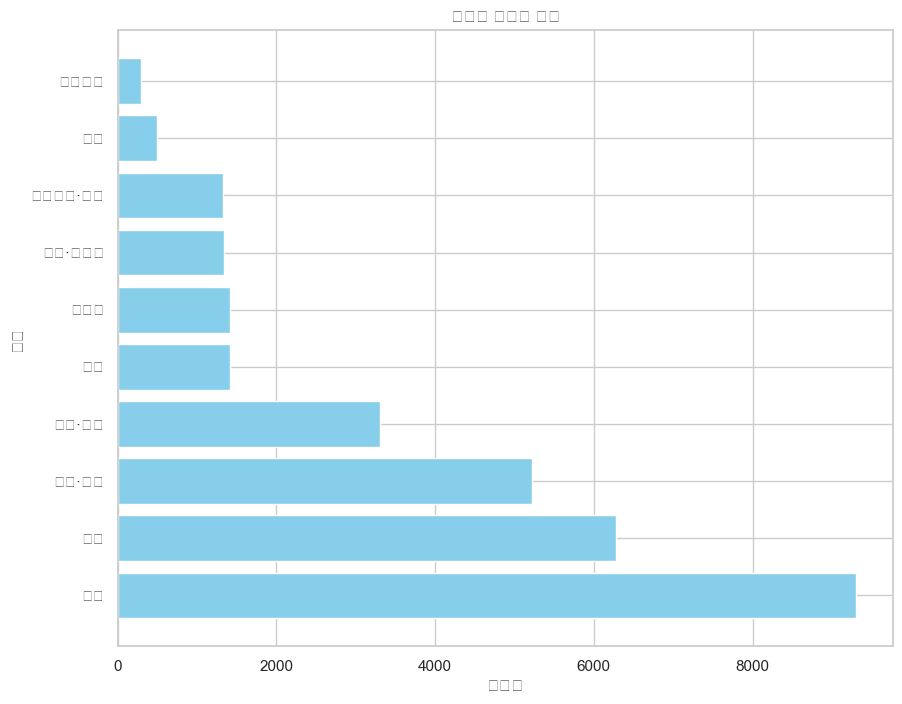

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 생성
data = {
    '분야': ['과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠', '음식'],
    '총합계': [5220, 1415, 287, 1411, 6281, 3301, 493, 1330, 1339, 9302]
}

df = pd.DataFrame(data)

# 총합계를 기준으로 내림차순 정렬
df_sorted = df.sort_values('총합계', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['분야'], df_sorted['총합계'], color='skyblue')
plt.xlabel('총합계')
plt.ylabel('분야')
plt.title('분야별 총합계 분포')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\s

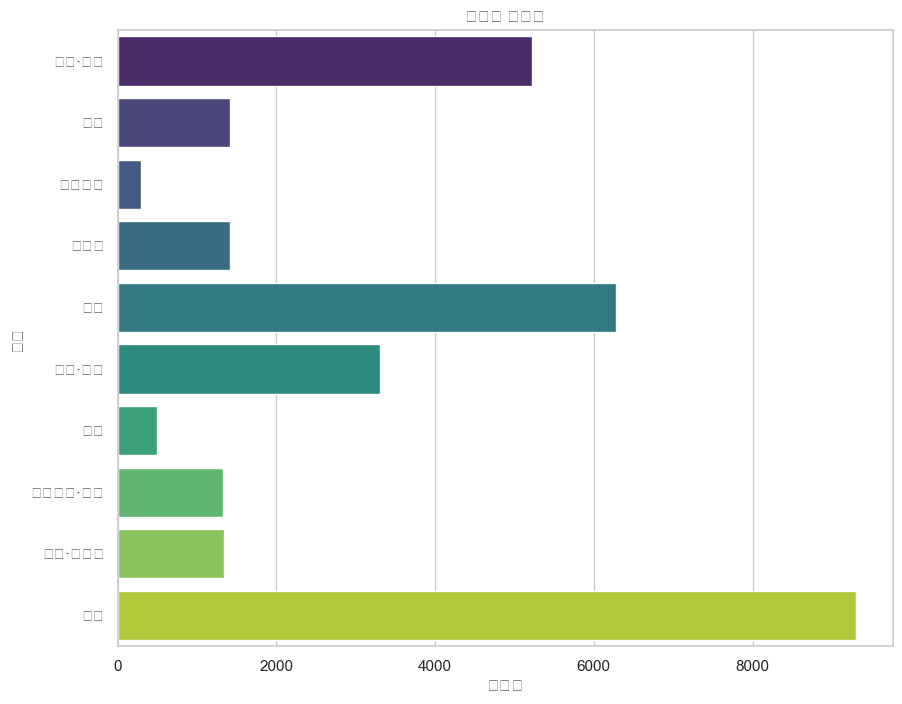

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "총합계"],
    "강북_김형선": ["2,890", "330", "46", "353", "1,259", "575", "37", "409", "190", "2,057", "8,146"],
    "강북_사공관": ["1,981", "858", "207", "888", "3,875", "1,948", "198", "714", "904", "5,001", "16,574"],
    "강원_권문석": ["349", "227", "34", "170", "1,147", "778", "258", "207", "245", "2,244", "5,659"],
    "총합계": ["5,220", "1,415", "287", "1,411", "6,281", "3,301", "493", "1,330", "1,339", "9,302", "30,379"]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 콤마 제거 및 데이터 타입 변환
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(int)

# '총합계'를 제외한 분야별 총합계 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='총합계', y='구분', data=df[:-1], palette='viridis')  # 마지막 행 '총합계' 제외
plt.title('분야별 총합계')
plt.xlabel('총합계')
plt.ylabel('구분')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\s

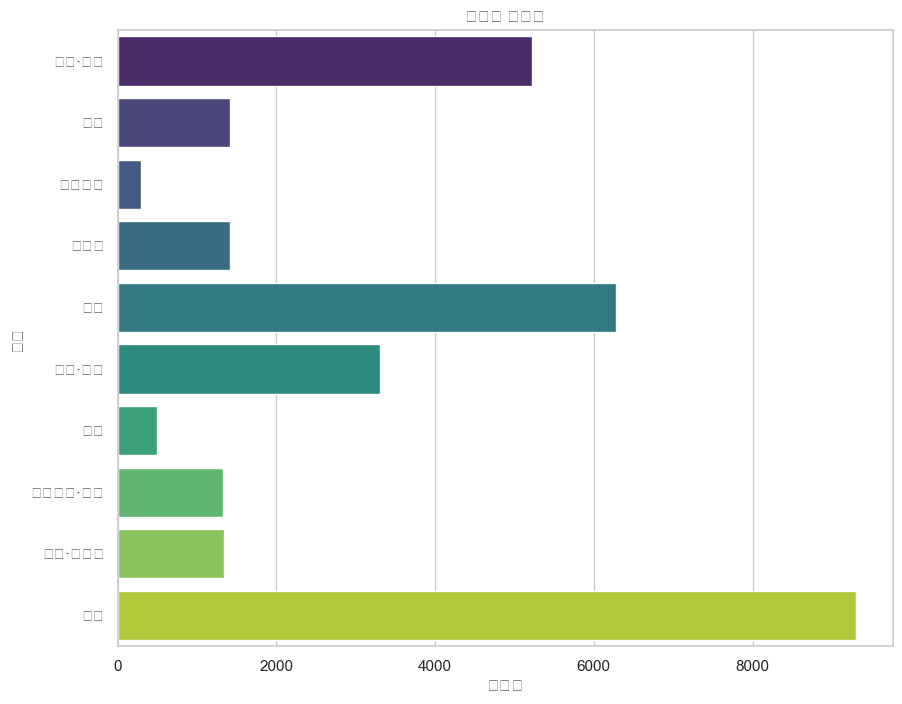

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "총합계"],
    "강북_김형선": ["2,890", "330", "46", "353", "1,259", "575", "37", "409", "190", "2,057", "8,146"],
    "강북_사공관": ["1,981", "858", "207", "888", "3,875", "1,948", "198", "714", "904", "5,001", "16,574"],
    "강원_권문석": ["349", "227", "34", "170", "1,147", "778", "258", "207", "245", "2,244", "5,659"],
    "총합계": ["5,220", "1,415", "287", "1,411", "6,281", "3,301", "493", "1,330", "1,339", "9,302", "30,379"]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 콤마 제거 및 데이터 타입 변환
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(int)

# '총합계'를 제외한 분야별 총합계 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='총합계', y='구분', data=df[:-1], palette='viridis')  # 마지막 행 '총합계' 제외
plt.title('분야별 총합계')
plt.xlabel('총합계')
plt.ylabel('구분')
plt.show()


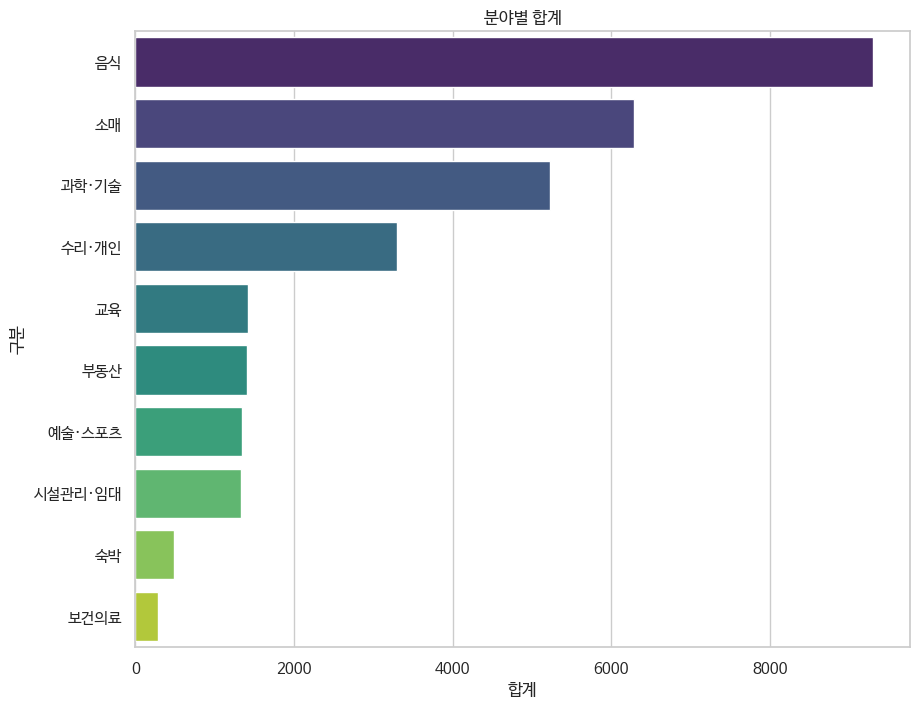

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "합계"],
    "강북_김형선": ["2,890", "330", "46", "353", "1,259", "575", "37", "409", "190", "2,057", "8,146"],
    "강북_사공관": ["1,981", "858", "207", "888", "3,875", "1,948", "198", "714", "904", "5,001", "16,574"],
    "강원_권문석": ["349", "227", "34", "170", "1,147", "778", "258", "207", "245", "2,244", "5,659"],
    "합계": ["5,220", "1,415", "287", "1,411", "6,281", "3,301", "493", "1,330", "1,339", "9,302", "30,379"]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 콤마 제거 및 데이터 타입 변환
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(int)

# '총합계'를 제외한 분야별 총합계 시각화를 위해 '총합계' 열 기준으로 내림차순 정렬
df_sorted = df[:-1].sort_values(by='합계', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='합계', y='구분', data=df_sorted, palette='viridis')
plt.title('분야별 합계')
plt.xlabel('합계')
plt.ylabel('구분')
plt.show()


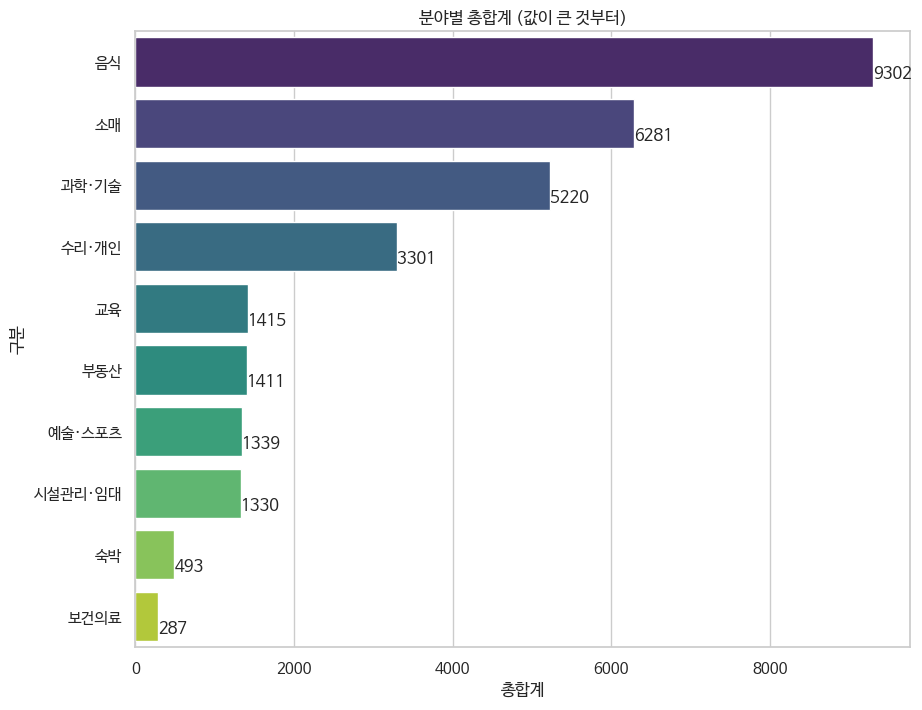

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "총합계"],
    "강북_김형선": ["2,890", "330", "46", "353", "1,259", "575", "37", "409", "190", "2,057", "8,146"],
    "강북_사공관": ["1,981", "858", "207", "888", "3,875", "1,948", "198", "714", "904", "5,001", "16,574"],
    "강원_권문석": ["349", "227", "34", "170", "1,147", "778", "258", "207", "245", "2,244", "5,659"],
    "총합계": ["5,220", "1,415", "287", "1,411", "6,281", "3,301", "493", "1,330", "1,339", "9,302", "30,379"]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 콤마 제거 및 데이터 타입 변환
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(int)

# '총합계'를 제외한 분야별 총합계 시각화를 위해 '총합계' 열 기준으로 내림차순 정렬
df_sorted = df[:-1].sort_values(by='총합계', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='viridis')
plt.title('분야별 총합계 (값이 큰 것부터)')
plt.xlabel('총합계')
plt.ylabel('구분')

# 각 막대에 값 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2. + 0.2, '{:1.0f}'.format(width), ha='left', va='center')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "총합계"],
    "강북_김형선": ["2,890", "330", "46", "353", "1,259", "575", "37", "409", "190", "2,057", "8,146"],
    "강북_사공관": ["1,981", "858", "207", "888", "3,875", "1,948", "198", "714", "904", "5,001", "16,574"],
    "강원_권문석": ["349", "227", "34", "170", "1,147", "778", "258", "207", "245", "2,244", "5,659"],
    "총합계": ["5,220", "1,415", "287", "1,411", "6,281", "3,301", "493", "1,330", "1,339", "9,302", "30,379"]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 콤마 제거 및 데이터 타입 변환
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(int)

# '총합계'를 제외한 분야별 총합계 시각화를 위해 '총합계' 열 기준으로 내림차순 정렬
df_sorted = df[:-1].sort_values(by='총합계', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='viridis')
plt.title('분야별 총합계 (값이 큰 것부터)')
plt.xlabel('총합계')
plt.ylabel('구분')

# 각 막대에 천 단위 구분 기호(',')가 포함된 값 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2. + 0.2, '{:,.0f}'.format(width), ha='left', va='center')

plt.show()



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식", "총합계"],
    "총합계": [5220, 1415, 287, 1411, 6281, 3301, 493, 1330, 1339, 9302, 30379]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '총합계' 행을 제외
df_filtered = df[df['구분'] != '총합계']

# '총합계' 열 기준으로 내림차순 정렬
df_sorted = df_filtered.sort_values(by='총합계', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='viridis', edgecolor='lightgrey', linewidth=0.5)
plt.title('분야별 총합계 (값이 큰 것부터) - 총합계 제외')
plt.xlabel('총합계')
plt.ylabel('구분')

# 각 막대에 값 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2. + 0.2, '{:,.0f}'.format(width), ha='left', va='center')

plt.show()


ImportError: C extension: pandas.compat not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

In [158]:
import pandas as pd

data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식"],
    "총합계": [5220, 1415, 287, 1411, 6281, 3301, 493, 1330, 1339, 9302]
}

df = pd.DataFrame(data)


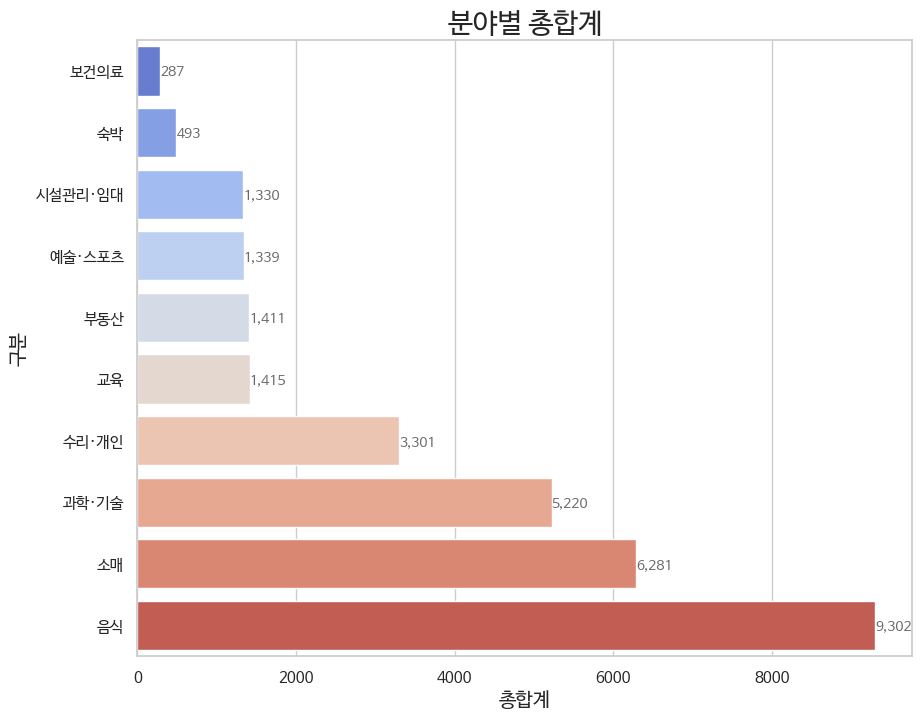

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 정렬
df_sorted = df.sort_values(by='총합계', ascending=True)

# 멋진 그래프 그리기
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='coolwarm')

# 타이틀과 라벨 추가
plt.title('분야별 총합계', fontsize=20)
plt.xlabel('총합계', fontsize=14)
plt.ylabel('구분', fontsize=14)

# 값 표시
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.6*i.get_height(),
            '{:,.0f}'.format(i.get_width()), 
            fontsize=10, color='dimgrey')

plt.show()


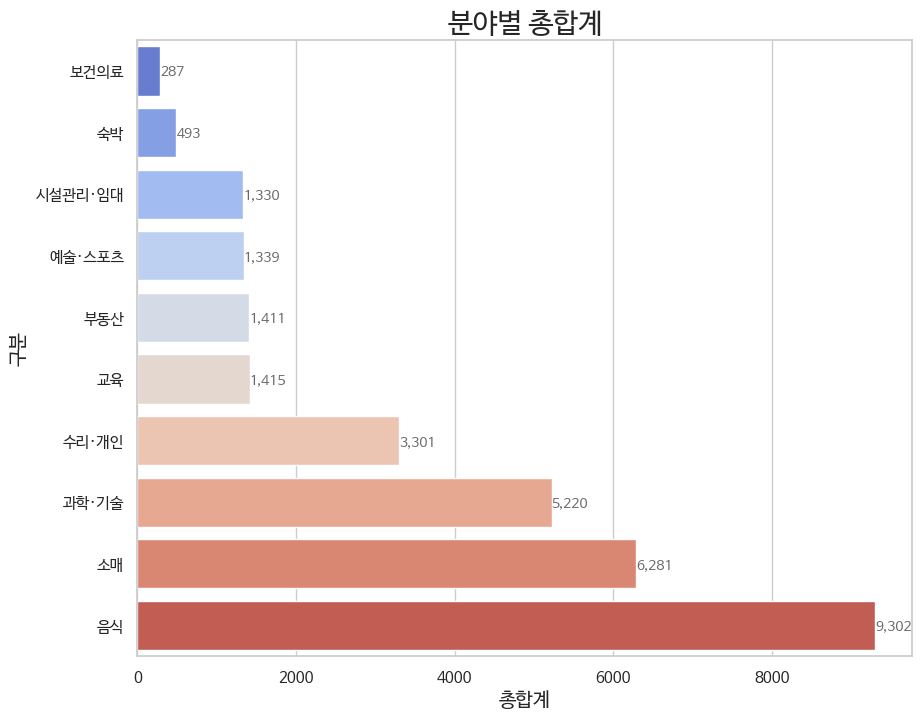

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 정렬
df_sorted = df.sort_values(by='총합계', ascending=True)

# 멋진 그래프 그리기
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='coolwarm')

# 타이틀과 라벨 추가
plt.title('분야별 총합계', fontsize=20)
plt.xlabel('총합계', fontsize=14)
plt.ylabel('구분', fontsize=14)

# 값 표시
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.6*i.get_height(),
            '{:,.0f}'.format(i.get_width()), 
            fontsize=10, color='dimgrey')

plt.show()


In [161]:
palette_reversed = sns.color_palette("coolwarm").reverse()


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 정렬
df_sorted = df.sort_values(by='합계', ascending=True)

# 멋진 그래프 그리기
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='합계', y='구분', data=df_sorted, palette='coolwarm')

# 타이틀과 라벨 추가
plt.title('분야별 합계', fontsize=20)
plt.xlabel('합계', fontsize=14)
plt.ylabel('구분', fontsize=14)

# 값 표시
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.6*i.get_height(),
            '{:,.0f}'.format(i.get_width()), 
            fontsize=10, color='dimgrey')

plt.show()


KeyError: '합계'

In [163]:
# 필요 라이브러리 설치
!pip install matplotlib seaborn plotly kaleido

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터 생성
x = range(10)
y = [i**2 for i in x]

# Seaborn으로 컬러 팔레트 역순으로 설정
palette_reversed = sns.color_palette("coolwarm").as_hex()[::-1]

# Matplotlib으로 그래프 생성
plt.figure(figsize=(10, 6))
for i, color in zip(range(len(x)), palette_reversed):
    plt.bar(x[i], y[i], color=color)

plt.title('Color Reversed Bar Chart')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# 그래프를 이미지 파일로 저장
plt.savefig('matplotlib_reversed_colors.png')
plt.close()


In [165]:
import plotly.graph_objects as go

# 3D 샘플 데이터 생성
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [1, 4, 9, 16, 25]

# Plotly로 3D 그래프 생성
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=12,
                                               color=z,  # 색상은 z 값에 따라 달라짐
                                               colorscale='Viridis',  # 색상 스케일
                                               opacity=0.8))])

# 레이아웃 설정
fig.update_layout(title='3D Scatter Plot Example',
                  scene=dict(xaxis_title='X Axis',
                             yaxis_title='Y Axis',
                             zaxis_title='Z Axis'))

# 그래프를 HTML 파일로 저장 (인터랙티브 기능 유지)
fig.write_html('plotly_3d_scatter.html')

# 그래프를 이미지 파일로 저장 (PPT 삽입용)
fig.write_image('plotly_3d_scatter.png')


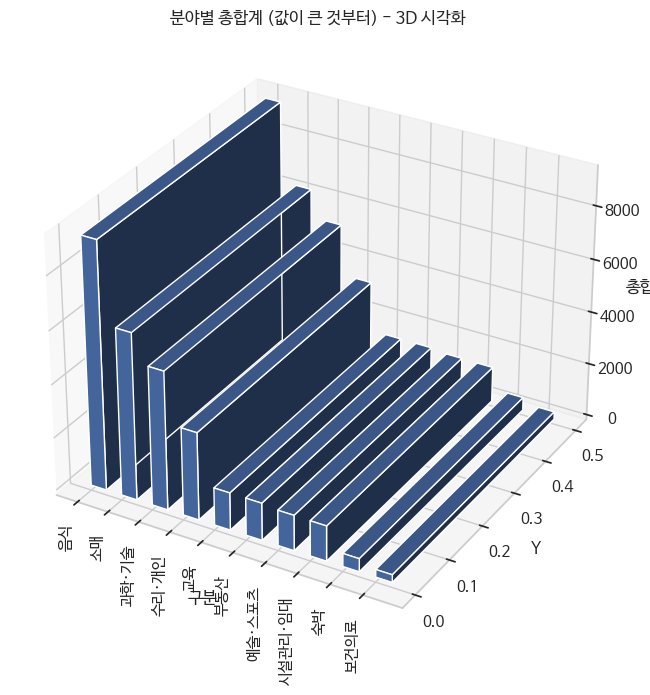

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식"],
    "총합계": [5220, 1415, 287, 1411, 6281, 3301, 493, 1330, 1339, 9302]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '총합계' 열 기준으로 내림차순 정렬
df_sorted = df.sort_values(by='총합계', ascending=False)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 막대 위치 설정을 위한 변수
xpos = range(len(df_sorted))
ypos = [0] * len(df_sorted)
zpos = [0] * len(df_sorted)

# 막대 크기 설정
dx = [0.5] * len(df_sorted)
dy = [0.5] * len(df_sorted)
dz = df_sorted['총합계'].values

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

# x축에 구분 표시
ax.set_xticks(range(len(df_sorted)))
ax.set_xticklabels(df_sorted['구분'].values, rotation=90)

ax.set_xlabel('구분')
ax.set_ylabel('Y')
ax.set_zlabel('총합계')

plt.title('분야별 총합계 (값이 큰 것부터) - 3D 시각화')

plt.show()


In [168]:
import pandas as pd

data = {
    "구분": ["과학·기술", "교육", "보건의료", "부동산", "소매", "수리·개인", "숙박", "시설관리·임대", "예술·스포츠", "음식"],
    "합계": [5220, 1415, 287, 1411, 6281, 3301, 493, 1330, 1339, 9302]
}

df = pd.DataFrame(data)


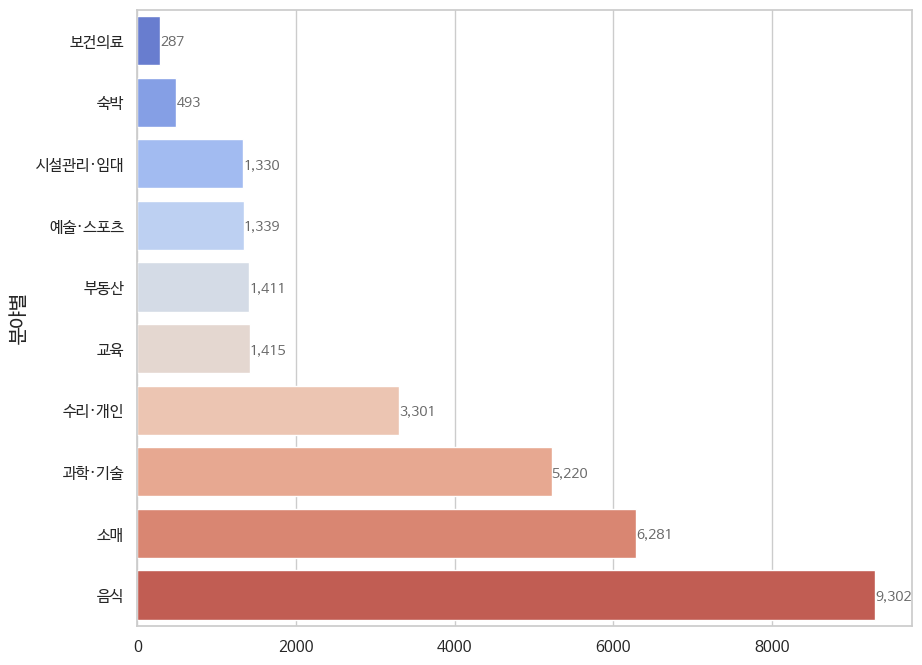

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 정렬
df_sorted = df.sort_values(by='합계', ascending=True)

# 멋진 그래프 그리기
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='합계', y='구분', data=df_sorted, palette='coolwarm')

# 타이틀과 라벨 추가
plt.title('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.ylabel('분야별', fontsize=14)

# 값 표시
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.6*i.get_height(),
            '{:,.0f}'.format(i.get_width()), 
            fontsize=10, color='dimgrey')

plt.show()


In [1]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple/Note: you may need to restart the kernel to use updated packages.



In [ ]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '강북_김형선', '강북_사공관', '강원_권문석'
sizes = [27, 55, 19]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0.0, 0, 1)  # 첫 번째 조각은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('점유율')

# 차트 보여주기
plt.show()


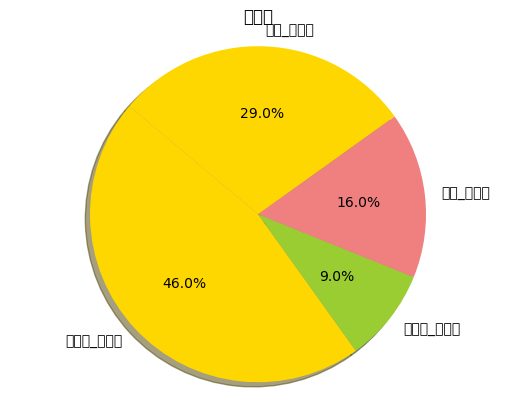

In [4]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '의정부_정성록', '의정부_김진회', '강원_권문석', '원주_경규원'
sizes = [46, 9, 16, 29]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0.0, 0,0,0)  # 첫 번째 조각은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('점유율')

# 차트 보여주기
plt.show()


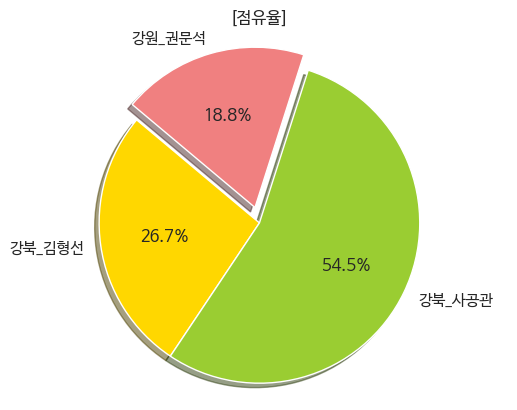

In [183]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '강북_김형선', '강북_사공관', '강원_권문석'
sizes = [27, 55, 19]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0, 0, 0.1)  # 세 번째 조각(강원_권문석)은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('[점유율]')

# 차트 보여주기
plt.show()


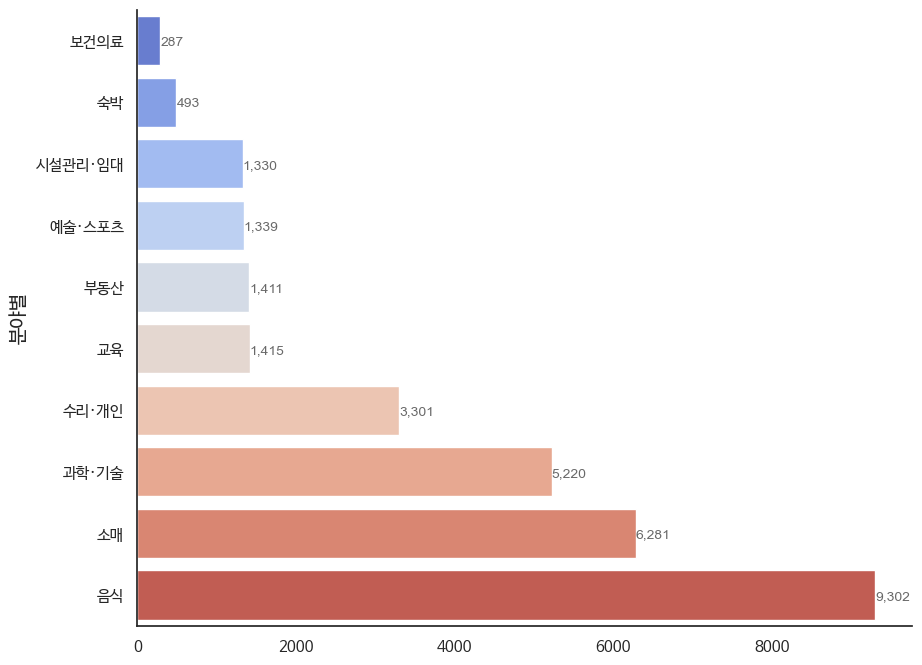

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 정렬
df_sorted = df.sort_values(by='합계', ascending=True)

# 멋진 그래프 그리기
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='합계', y='구분', data=df_sorted, palette='coolwarm')

# seaborn 스타일 설정
sns.set_style("white") # 배경 스타일을 'white'로 설정하여 그리드 제거
sns.despine() # 상단 및 우측 테두리 제거

# 타이틀과 라벨 추가
plt.title('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.ylabel('분야별', fontsize=14)

# 그리드 제거
plt.grid(False) # 그래프의 그리드선을 제거

# 값 표시
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.6*i.get_height(),
            '{:,.0f}'.format(i.get_width()), 
            fontsize=10, color='dimgrey')

plt.show()



In [1]:
pip install pandas requests openpyxl


In [2]:
import pandas as pd
import requests
from openpyxl import Workbook

# 엑셀 파일 불러오기
df = pd.read_excel('주소가_담긴_파일.xlsx')  # '주소가_담긴_파일.xlsx'를 실제 파일 경로로 변경하세요.

# 새로운 워크북 생성
wb = Workbook()
ws = wb.active
ws.append(['도로명주소', '구주소'])  # 열 제목 추가

# API 키 입력
api_key = 'YOUR_API_KEY'  # 'YOUR_API_KEY'를 발급받은 실제 API 키로 변경하세요.

for address in df['T']:  # 'T'는 엑셀 파일의 도로명 주소가 있는 열입니다.
    url = f'http://www.juso.go.kr/addrlink/addrLinkApi.do?confmKey={api_key}&currentPage=1&countPerPage=1&keyword={address}&resultType=json'
    response = requests.get(url)
    try:
        old_address = response.json()['results']['juso'][0]['jibunAddr']
        ws.append([address, old_address])
    except (KeyError, IndexError):
        ws.append([address, '조회 실패'])

wb.save('변환된_주소_결과.xlsx')  # 결과 파일 저장


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


FileNotFoundError: [Errno 2] No such file or directory: '주소가_담긴_파일.xlsx'

In [29]:
import pandas as pd
import glob
import chardet

# 폴더 경로 지정
folder = 'D:\\공공기관 데이터모음\\인허가자료\\의료업 전체\\'

# 해당 폴더 내의 모든 .csv 파일 목록을 가져옴
csv_files = glob.glob(folder + '*.csv')

# 병합할 데이터프레임 리스트 초기화
df_list = []
# 열이 일치하지 않는 파일 목록 초기화
excluded_files = []

# 기준이 될 열 목록
standard_columns = [
    '주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소', 
    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명'
]

for file in csv_files:
    # 각 파일 열기 및 인코딩 감지
    with open(file, 'rb') as f:
        result = chardet.detect(f.read(100000))  # 첫 100000 바이트를 읽어 인코딩 감지
    encoding = result['encoding']
    
    # 감지된 인코딩을 사용하여 CSV 파일 읽기
    df_temp = pd.read_csv(file, encoding=encoding)
    
    # 파일의 열과 기준 열 목록 비교
    if set(standard_columns).issubset(set(df_temp.columns)):
        # 필요한 열만 선택하여 데이터프레임 리스트에 추가
        df_list.append(df_temp[standard_columns])
    else:
        # 열이 일치하지 않는 파일 목록에 추가
        excluded_files.append(file)

# 모든 데이터프레임을 하나로 병합
df_merged = pd.concat(df_list, ignore_index=True)

# 병합된 데이터 확ㅠ인
print(df_merged.head())  # 데이터프레임의 처음 몇 줄을 출력하여 확인

# 열이 일치하지 않아 제외된 파일 목록 출력
print("\n제외된 파일 목록:")
for file in excluded_files:
    print(file)


ValueError: No objects to concatenate

In [4]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd

# 파일 경로
file_path = 'D:\\test1\\20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

# CSV 파일 읽기 (인코딩이 필요하다면 적절히 조정하세요)
df = pd.read_csv(file_path, encoding='cp949)  # 또는 'euc-kr', 'cp949' 등


SyntaxError: unterminated string literal (detected at line 7) (2832224911.py, line 7)

In [23]:
import pandas as pd

# 파일 경로
file_path = 'D:\\test1\\20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

# CSV 파일 읽기 (인코딩이 필요하다면 적절히 조정하세요)
df = pd.read_csv(file_path, encoding='cp949')  # 'euc-kr' 또는 'cp949' 등을 사용할 수 있습니다.


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\test1\\20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

In [20]:
encodings = ['utf-8', 'cp949', 'euc-kr', 'ISO-8859-1', 'latin1']
for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f'{enc} 인코딩으로 파일 읽기 성공!')
        break
    except Exception as e:
        print(f'{enc} 인코딩으로 시도했으나 실패: {e}')


utf-8 인코딩으로 시도했으나 실패: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte
cp949 인코딩으로 파일 읽기 성공!


In [17]:
import csv



In [21]:
encodings = ['cp949'euc-kr', 'ISO-8859-1', 'latin1']
for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f'{enc} 인코딩으로 파일 읽기 성공!')
        break
    except Exception as e:
        print(f'{enc} 인코딩으로 시도했으나 실패: {e}')


utf-8 인코딩으로 시도했으나 실패: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte
cp949 인코딩으로 파일 읽기 성공!


In [24]:
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'


In [25]:
with open(file_path, mode='r', encoding='cp949') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)


['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)', '수리대상 의료기기의 유형', '다른 겸업 여부', '총규모', '영업규모', '']
['1', '의료기기판매(임대)업', '01_02_03_P', '3740000', 'PHMG120213740106047000035', '2021-04-30', '', '01', '영업/정상', '13', '영업중', '', '', '', '', '', '', '', '경기도 수원시 영통구 원천동 산 **-* 아주대학병원', '경기도 수원시 영통구 월드컵로 ***, 아주대학병원 B*층 (원천동)', '16499', '세븐일레븐 아주대병원점', '2024-03-01 15:02:14', 'U', '2024-03-03 02:40:00', '', '204210.046525146', '419791.636818158', '', '', '', '', '']
['2', '의료기기판매(임대)업', '01_02_03_P', '3940000', 'PHMG120183940138047000020', '2016-09-09', '', '03', '폐업', '03', '폐업', '2024-02-29', '', '', '', '', '', '', '경기도 고양시 덕양구 토당동 ***번지 *호 *층 일부', '경기도 고양시 덕양구 지도로 **, *층 (토당동)', '10510', '알디메디(RDMedi)', '2024-03-01 09:22:07', 'U', '2024-03-03 02:40:00', '', '184

In [38]:
import csv

# 원본 파일 경로
file_path = 'D:\\test1\\20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'
# 저장할 새 파일 경로
output_file_path = 'D:\\test1\\filtered_data.csv'

# 관심 있는 열 이름
columns_of_interest = [
    '주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소',
    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명'
]

# 원본 파일에서 필요한 데이터를 추출하여 새 파일에 저장
with open(file_path, mode='r', encoding='cp949') as file:
    csv_reader = csv.DictReader(file)
    # 새 파일에 쓰기 준비
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=columns_of_interest)
        csv_writer.writeheader()
        for row in csv_reader:
            # 관심 있는 열만 추출하여 쓰기
            csv_writer.writerow({key: row[key] for key in columns_of_interest if key in row})

# 새로운 파일 열기 및 내용 확인
with open(output_file_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\test1\\20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

In [39]:
import csv

# 원본 파일 경로
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'
# 저장할 새 파일 경로
output_file_path = r'D:\test1\address_and_name.csv'

# '주소', '상호명' 열만 추출하여 새 파일에 저장
with open(file_path, mode='r', encoding='cp949') as file:
    csv_reader = csv.reader(file)
    # 새 파일에 쓰기 준비
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as output_file:
        csv_writer = csv.writer(output_file)
        # 열 헤더 쓰기
        csv_writer.writerow(['주소', '상호명'])
        # 첫 번째 열이 '주소', 두 번째 열이 '상호명'이라고 가정하고 각 행에서 해당 데이터 추출
        for row in csv_reader:
            # 주소와 상호명만 포함하는 행을 새 파일에 쓰기
            csv_writer.writerow([row[0], row[1]])

# 새로운 파일 열기 및 내용 확인
with open(output_file_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)


['주소', '상호명']
['번호', '개방서비스명']
['1', '의료기기판매(임대)업']
['2', '의료기기판매(임대)업']
['3', '의료기기판매(임대)업']
['4', '의료기기판매(임대)업']
['5', '의료기기판매(임대)업']
['6', '의료기기판매(임대)업']
['7', '의료기기판매(임대)업']
['8', '의료기기판매(임대)업']
['9', '의료기기판매(임대)업']
['10', '의료기기판매(임대)업']
['11', '의료기기판매(임대)업']
['12', '의료기기판매(임대)업']
['13', '의료기기판매(임대)업']
['14', '의료기기판매(임대)업']
['15', '의료기기판매(임대)업']
['16', '의료기기판매(임대)업']
['17', '의료기기판매(임대)업']
['18', '의료기기판매(임대)업']
['19', '의료기기판매(임대)업']
['20', '의료기기판매(임대)업']
['21', '의료기기판매(임대)업']
['22', '의료기기판매(임대)업']
['23', '의료기기판매(임대)업']
['24', '의료기기판매(임대)업']
['25', '의료기기판매(임대)업']
['26', '의료기기판매(임대)업']
['27', '의료기기판매(임대)업']
['28', '의료기기판매(임대)업']
['29', '의료기기판매(임대)업']
['30', '의료기기판매(임대)업']
['31', '의료기기판매(임대)업']
['32', '의료기기판매(임대)업']
['33', '의료기기판매(임대)업']
['34', '의료기기판매(임대)업']
['35', '의료기기판매(임대)업']
['36', '의료기기판매(임대)업']
['37', '의료기기판매(임대)업']
['38', '의료기기판매(임대)업']
['39', '의료기기판매(임대)업']
['40', '의료기기판매(임대)업']
['41', '의료기기판매(임대)업']
['42', '의료기기판매(임대)업']
['43', '의료기기판매(임대)업']
['44', '의료기기판매(임대)업']
['45', '의료

In [40]:
import csv

# 원본 파일 경로
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'
# 저장할 새 파일 경로
output_file_path = r'D:\test1\selected_columns.csv'

# 추출하고자 하는 열 이름
selected_columns = ['주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
                    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소',
                    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명']

# 원본 파일을 열고 필요한 열만 추출하여 새 파일에 저장
with open(file_path, mode='r', encoding='cp949') as file:
    csv_reader = csv.DictReader(file)
    selected_data = []

    # 필요한 열만 추출하여 리스트에 저장
    for row in csv_reader:
        selected_row = {col: row.get(col, None) for col in selected_columns}
        selected_data.append(selected_row)

# 새 파일에 저장
with open(output_file_path, mode='w', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.DictWriter(output_file, fieldnames=selected_columns)
    csv_writer.writeheader()
    for row in selected_data:
        # None 값이 있는 행은 제외하고 쓰기
        if not any(value is None for value in row.values()):
            csv_writer.writerow(row)

# 작업 완료 안내
print(f"작업이 완료되었습니다. 데이터가 저장된 파일의 경로: {output_file_path}")


작업이 완료되었습니다. 데이터가 저장된 파일의 경로: D:\test1\selected_columns.csv


In [44]:
import csv

# 원본 파일 경로
file_path = import csv

# 원본 파일 경로
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'  # 여기서 'your_file_path.csv'를 실제 파일 경로로 변경하세요.
# 저장할 새 파일 경로
output_file_path = 'output_file_path.csv'  # 여기서 'output_file_path.csv'를 원하는 출력 파일 경로로 변경하세요.

# 추출하고자 하는 열 이름
selected_columns = ['주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
                    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소',
                    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명']

try:
    # 원본 파일을 열기 (인코딩 방식 변경을 시도해보세요.)
    with open(file_path, mode='r', encoding='utf-8') as file:  # 'utf-8' 대신 'cp949'로 변경해보세요.
        csv_reader = csv.DictReader(file)
        selected_data = []

        # 필요한 열만 추출하여 리스트에 저장
        for row in csv_reader:
            selected_row = {col: row.get(col, '') for col in selected_columns if col in row}
            selected_data.append(selected_row)

    # 새 파일에 저장
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=selected_columns)
        csv_writer.writeheader()
        csv_writer.writerows(selected_data)

    print(f"작업이 완료되었습니다. 데이터가 저장된 파일의 경로: {output_file_path}")

except FileNotFoundError:
    print("입력한 파일 경로를 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except Exception as e:
    print(f"예상치 못한 오류가 발생했습니다: {e}")
  # 여기서 'your_file_path.csv'를 실제 파일 경로로 변경하세요.
# 저장할 새 파일 경로
output_file_path = 'output_file_path.csv'  # 여기서 'output_file_path.csv'를 원하는 출력 파일 경로로 변경하세요.

# 추출하고자 하는 열 이름
selected_columns = ['주소', '상호명', '업종', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
                    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소',
                    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명']

try:
    # 원본 파일을 열기 (인코딩 방식 변경을 시도해보세요.)
    with open(file_path, mode='r', encoding='cp949') as file:  # 'utf-8' 대신 'cp949'로 변경해보세요.
        csv_reader = csv.DictReader(file)
        selected_data = []

        # 필요한 열만 추출하여 리스트에 저장
        for row in csv_reader:
            selected_row = {col: row.get(col, '') for col in selected_columns if col in row}
            selected_data.append(selected_row)

    # 새 파일에 저장
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=selected_columns)
        csv_writer.writeheader()
        csv_writer.writerows(selected_data)

    print(f"작업이 완료되었습니다. 데이터가 저장된 파일의 경로: {output_file_path}")

except FileNotFoundError:
    print("입력한 파일 경로를 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except Exception as e:
    print(f"예상치 못한 오류가 발생했습니다: {e}")


SyntaxError: invalid syntax (4161382799.py, line 4)

In [56]:
import csv

# 여기서 파일 경로를 직접 지정해주세요. 예를 들어, 'C:/Users/YourName/Documents/data.csv'
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

# 저장할 새 파일 경로도 지정해주세요.
output_file_path = r'D:\test1\조건_file_path.csv'

# 추출하고자 하는 열 이름들을 지정해주세요.
selected_columns = ['소재지전체주소','도로명전체주소','도로명우편번호','사업장명', '개방서비스명', '인허가일자', '인허가취소', '영업상태명', '폐업일자',
                    '휴업시작일', '휴업종료일', '재개업일자', '소재지전화', '소재지전체주소',
                    '도로명전체주소', '사업장명', '최종수정시점', '업태구분명']

try:
    # 원본 파일을 열기 (인코딩 방식 변경을 시도해보세요.)
    with open(file_path, mode='r', encoding='cp949') as file:  # 'utf-8' 대신 'cp949'로 변경해보세요.
        csv_reader = csv.DictReader(file)
        selected_data = []

        # 필요한 열만 추출하여 리스트에 저장
        for row in csv_reader:
            selected_row = {col: row.get(col, '') for col in selected_columns if col in row}
            selected_data.append(selected_row)

    # 새 파일에 저장
    with open(output_file_path, mode='w', newline='', encoding='cp949') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=selected_columns)
        csv_writer.writeheader()
        csv_writer.writerows(selected_data)

    print(f"작업이 완료되었습니다. 데이터가 저장된 파일의 경로: {output_file_path}")

except FileNotFoundError:
    print("입력한 파일 경로를 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except Exception as e:
    print(f"예상치 못한 오류가 발생했습니다: {e}")

작업이 완료되었습니다. 데이터가 저장된 파일의 경로: D:\test1\조건_file_path.csv


In [57]:
import pandas as pd
import os
import glob

# 병합하고자 하는 파일이 위치한 디렉토리 경로
input_directory = r'D:\공공기관 데이터모음\인허가자료\0317\LOCALDATA_YESTERDAY_CSV'

# 저장할 새 파일의 경로
output_file_path = r'D:\test1\merged_files.csv'

# 해당 디렉토리에서 모든 CSV 파일 목록을 가져옴
all_files = glob.glob(os.path.join(input_directory, "*.csv"))

# 각 파일을 읽어서 하나의 DataFrame으로 병합
df_from_each_file = (pd.read_csv(f, encoding='cp949') for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)

# 병합된 데이터를 새 파일에 저장
concatenated_df.to_csv(output_file_path, index=False, encoding='cp949')

print(f"작업이 완료되었습니다. 병합된 데이터가 저장된 파일의 경로: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_2424\1767739968.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat(df_from_each_file, ignore_index=True)


작업이 완료되었습니다. 병합된 데이터가 저장된 파일의 경로: D:\test1\merged_files.csv


In [60]:
import pandas as pd
import os
import glob

# 병합하고자 하는 파일이 위치한 디렉토리 경로
input_directory = r'D:\공공기관 데이터모음\인허가자료\0317\LOCALDATA_YESTERDAY_CSV'

# 저장할 새 파일의 경로
output_file_path = r'D:\test1\sorted_and_beautified.csv'

# 해당 디렉토리에서 모든 CSV 파일 목록을 가져옴
all_files = glob.glob(os.path.join(input_directory, "*.csv"))

# 각 파일을 읽어서 하나의 DataFrame으로 병합
df_from_each_file = (pd.read_csv(f, encoding='cp949') for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)

# '인허가일자' 기준으로 내림차순 정렬
# '인허가일자' 열이 있는지 확인하고, 해당 열의 데이터 타입이 날짜형인지 확인하세요.
# 데이터 형식이 'YYYYMMDD'와 같은 문자열이라면, 날짜형으로 변환해야 정렬이 올바르게 작동합니다.
if '인허가일자' in concatenated_df.columns:
    concatenated_df['인허가일자'] = pd.to_datetime(concatenated_df['인허가일자'], format='%Y%m%d', errors='coerce')
    concatenated_df.sort_values(by='인허가일자', ascending=False, inplace=True)

# 병합된 데이터를 새 파일에 저장
concatenated_df.to_csv(output_file_path, index=False, encoding='cp949')

print(f"작업이 완료되었습니다. 정렬 및 줄 바꿈이 적용된 데이터가 저장된 파일의 경로: {output_file_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_2424\343800192.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat(df_from_each_file, ignore_index=True)


작업이 완료되었습니다. 정렬 및 줄 바꿈이 적용된 데이터가 저장된 파일의 경로: D:\test1\sorted_and_beautified.csv


In [59]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import os
import glob

# 병합하고자 하는 파일이 위치한 디렉토리 경로
input_directory = r'D:\공공기관 데이터모음\인허가자료\0317\LOCALDATA_NOWMON_CSV'

# 저장할 새 파일의 경로
output_file_path = r'D:\test1\sorted_and_beautified.csv'

# 해당 디렉토리에서 모든 CSV 파일 목록을 가져옴
all_files = glob.glob(os.path.join(input_directory, "*.csv"))

# 각 파일을 읽어서 하나의 DataFrame으로 병합
df_from_each_file = (pd.read_csv(f, encoding='cp949') for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)

# '인허가일자' 기준으로 내림차순 정렬
# '인허가일자' 열이 있는지 확인하고, 해당 열의 데이터 타입이 날짜형인지 확인하세요.
# 데이터 형식이 'YYYYMMDD'와 같은 문자열이라면, 날짜형으로 변환해야 정렬이 올바르게 작동합니다.
if '인허가일자' in concatenated_df.columns:
    concatenated_df['인허가일자'] = pd.to_datetime(concatenated_df['인허가일자'], format='%Y%m%d', errors='coerce')
    concatenated_df.sort_values(by='인허가일자', ascending=False, inplace=True)

# 병합된 데이터를 새 파일에 저장
concatenated_df.to_csv(output_file_path, index=False, encoding='cp949')

print(f"작업이 완료되었습니다. 정렬 및 줄 바꿈이 적용된 데이터가 저장된 파일의 경로: {output_file_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_2424\2674784388.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_each_file = (pd.read_csv(f, encoding='cp949') for f in all_files)
C:\Users\User\AppData\Local\Temp\ipykernel_2424\2674784388.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat(df_from_each_file, ignore_index=True)


PermissionError: [Errno 13] Permission denied: 'D:\\test1\\sorted_and_beautified.csv'

In [63]:
from openpyxl import load_workbook

def add_naver_map_hyperlinks(file_path):
    wb = load_workbook(filename=file_path)
    ws = wb.active

    for row in range(2, ws.max_row + 1):  # 첫 번째 행을 제외하고 시작
        address = ws[f'b{row}'].value  # A열에서 주소 가져오기
        if address is not None:
            # 네이버 지도 검색 URL 생성
            map_url = f"https://map.naver.com/v5/search/{address}"
            # B열에 하이퍼링크 적용
            ws[f'c{row}'].hyperlink = map_url
            ws[f'c{row}'].value = "네이버 지도에서 보기"  # 표시할 텍스트
            ws[f'c{row}'].style = "Hyperlink"  # 하이퍼링크 스타일 적용

    wb.save(filename=file_path)  # 변경 사항 저장

file_path = 'D:\\공공기관 데이터모음\\지도0318.xlsx'  # 예: 'D:\\공공기관 데이터모음\\디비리아자료.xlsx'

add_naver_map_hyperlinks(file_path)  # 함수 실행

print("네이버 지도 하이퍼링크 추가 작업 완료!")

네이버 지도 하이퍼링크 추가 작업 완료!


In [64]:
import pandas as pd

# 파일 경로 설정
file_path = 'D:\\교육 경로\\상반기 산업안전보건 법정교육(온라인)_근로자 정기 샘플 답안.xls'

# Excel 파일 읽기
df = pd.read_excel(file_path)

# 처음 10건의 데이터 보여주기
print(df.head(10))


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\교육 경로\\상반기 산업안전보건 법정교육(온라인)_근로자 정기 샘플 답안.xls'

In [65]:
pip install pandas


In [ ]:
import pandas as pd

# Excel 파일 로드
file_path = 'D:\\공공기관 데이터모음\\24산업안전상반기답안.xlsx'
data = pd.read_excel(file_path)

# 사용자로부터 문제 내용의 일부 입력 받기
question_part = input("문제 내용의 일부(10자리)를 입력하세요: ")

# 입력받은 문제 내용을 포함하는 행 찾기
matched_questions = data[data['문제내용'].str.contains(question_part)]

# 일치하는 행이 있는 경우, 정답과 보기 출력
if not matched_questions.empty:
    for idx, row in matched_questions.iterrows():
        print("\n찾은 문제:", row['문제내용'])
        print("정답:", row['정답'])
        print("보기1:", row['보기1'])
        print("보기2:", row['보기2'])
        print("보기3:", row['보기3'])
        print("보기4:", row['보기4'])
else:
    print("일치하는 문제가 없습니다.")


In [3]:
file_path = r'D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

In [1]:
# 라이브러리 불러오기
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv("D:\test1\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv")

OSError: [Errno 22] Invalid argument: 'D:\test1\\(20240301~20240315)_01_02_03_P_의료기기판매임대업.csv'

ValueError: 'explode' must be of length 'x'

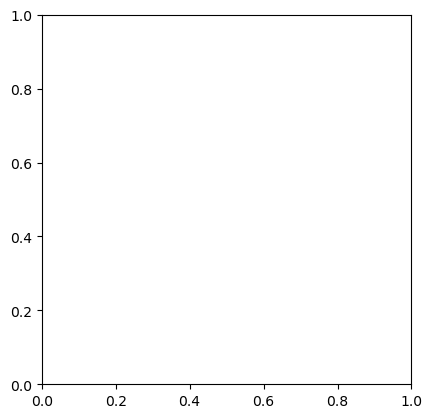

In [5]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '김성배', '김진회', '서은석', '성형래', '이한구', '최우석'
sizes = [416, 201, 305, 363, 569, 231]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0, 0, 0.1)  # 세 번째 조각(강원_권문석)은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('[점유율]')

# 차트 보여주기
plt.show()

In [6]:
# 필요한 라이브러리 호출
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import psutil
from itertools import count
from collections import deque

# 컴퓨터 CPU 사용량 출력
def cpu_usage():
    cpu = psutil.cpu_percent(interval = 0.5)
    return cpu

# 그래프 그리기
x = deque(maxlen = 30)
y = deque(maxlen = 30)
y2 = deque(maxlen = 30)
num_outlier = 0
index = count()
plt.style.use("seaborn")
def visualize(_):
    global num_outlier
    x.append(next(index))
    value = cpu_usage()
    y.append(value)
    plt.cla()
    plt.title("Real Time CPU Usage Monitoring")
    plt.plot(x, y, marker = "D", markersize = 2, linewidth = 3, 
             color = "orange", label = "CPU USAGE")
    plt.legend(loc = "best")
    plt.xlabel("Time To Read CPU USAGE")
    plt.ylabel("CPU USAGE(%)")
    plt.ylim(0, 55)
    # B. 한계를 벗어나는 이상치 표시하기
    # B-1. CPU의 사용율 한계를 표시하기
    plt.axhline(y = 15, color = "red", linestyle = "solid", linewidth = 2)
    # B-2. 수평선 = 한계의 명칭 표시하기
    plt.annotate(s = "Upper Control Limit", xy = (x[0], 13.5), color = "red")
    # B-3. 이상치를 저장하기 위한 리스트 생성
    # B-3-1. 이상치의 개수를 카운트하기 위한 변수 생성
    if value > 15:
        num_outlier += 1
        y2.append(value)
    else:
        y2.append(-10)
    # B-4. 그래프에 이상치 표현하기
    plt.plot(x, y2, marker = "D", color = "red", label = "outlier", linewidth = 0)
    # B-5. Marker에 Outlier라는 텍스트 첨가
    for i, element in enumerate(y):
        if element > 15:
            plt.annotate(s = "outlier", xy = (x[i]+0.1, y[i]),
                         color = "red")
    # B-6. 이상치의 누적 개수 표시하기
    plt.annotate(s = "Number of Outliers: {}".format(num_outlier),
                 xy = (x[0], 40), color = "black", size = 12)
    
    plt.fill_between(x, y, color = "orange", alpha = 0.3)
    plt.grid(True)

# 실시간 그래프를 애니매션으로 만들기   
real_time_graph = FuncAnimation(plt.gcf(), visualize, interval = 1000)
# 그래프 화면에 출력
plt.show()
[출처] [파이썬 응용] matplotlib 그래프 그리기 #4 : 실시간(Real Time) 그래프에 이상치와 이상치 개수 표시하기|작성자 코딩 연금술사

SyntaxError: invalid syntax. Perhaps you forgot a comma? (145891106.py, line 63)

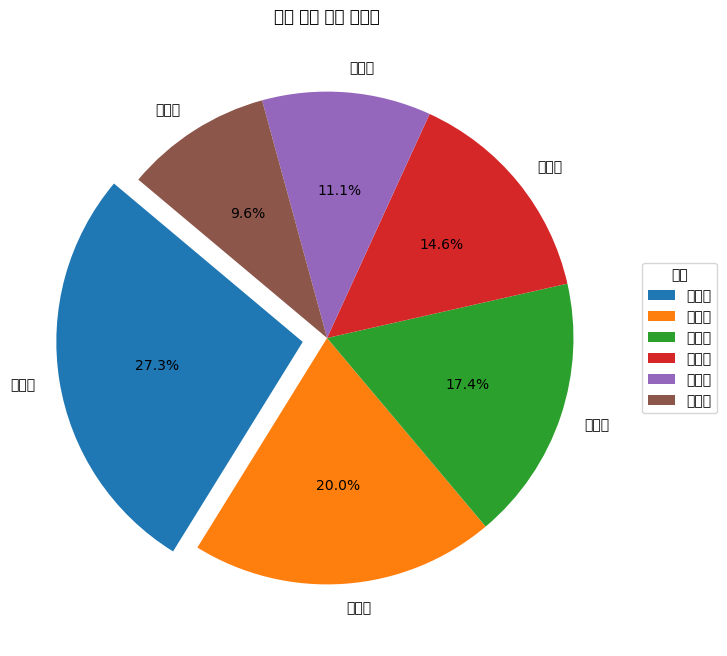

In [7]:
import matplotlib.pyplot as plt


names = ["이한구", "김성배", "성형래", "서은석", "최우석", "김진회"]
performance = [569, 416, 363, 305, 231, 201]



# 각 조각이 중심에서 벗어나는 정도 설정
explode = (0.1, 0, 0, 0, 0, 0)

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(performance, labels=names, autopct='%1.1f%%', startangle=140, explode=explode)

# 제목 추가
plt.title('실적 현황 원형 그래프')

# 범례 표시
plt.legend(names, title="이름", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 그래프 보여주기
plt.show()

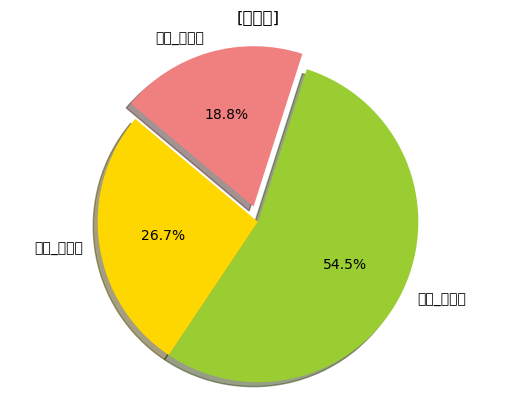

In [8]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '강북_김형선', '강북_사공관', '강원_권문석'
sizes = [27, 55, 19]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0, 0, 0.1)  # 세 번째 조각(강원_권문석)은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('[점유율]')

# 차트 보여주기
plt.show()

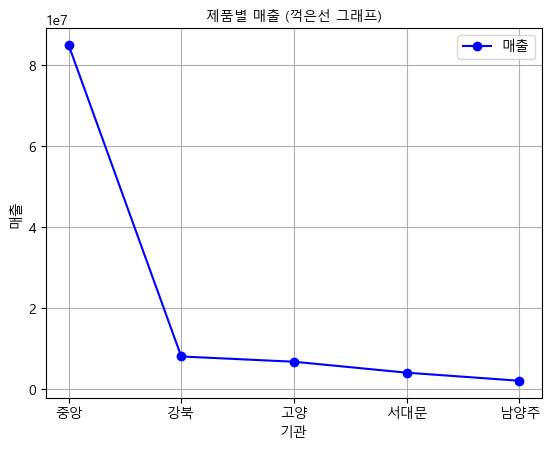

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 사용할 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 예시로 맑은 고딕을 사용합니다. 실제 경로에 있는 폰트를 선택하세요.

# 한글 폰트 설정
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 데이터 생성
products = ['중앙', '강북', '고양', '서대문', '남양주']
revenue = [85000000, 8000000, 6700000, 4000000, 2000000]

# 그래프 그리기 (꺽은선 그래프)
plt.plot(products, revenue, marker='o', color='b', label='매출')
plt.xlabel('기관', fontproperties=font_prop)
plt.ylabel('매출', fontproperties=font_prop)
plt.title('제품별 매출 (꺽은선 그래프)', fontproperties=font_prop)
plt.legend()
plt.grid(True)
plt.show()

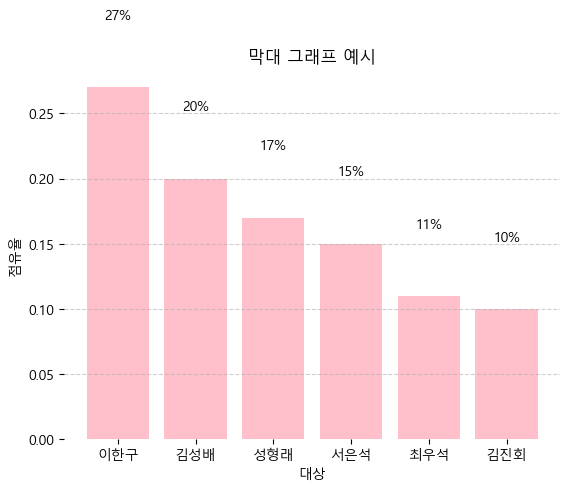

In [12]:
import matplotlib.pyplot as plt

# 'Malgun Gothic'을 사용할 수 있도록 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터를 설정합니다
x = ['이한구', '김성배', '성형래', '서은석', '최우석', '김진회']
y = [0.27, 0.20, 0.17, 0.15, 0.11, 0.10]  # 퍼센트 값을 실수로 변환

# 달성율이 낮은 값을 확인하기 위한 기준 설정
low_achieve = 1.00

# 막대 그래프를 그립니다
bars = plt.bar(x, y, color=['skyblue' if value >= low_achieve else 'pink' for value in y])

# 각 막대에 해당하는 값(달성율)을 표시합니다
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{int(yval*100)}%', ha='center', va='bottom')

# 그래프의 제목과 x, y축 라벨을 설정합니다
plt.title('막대 그래프 예시')
plt.xlabel('대상')
plt.ylabel('점유율')

# 배경선을 제거합니다
plt.box(False)

# 보조선을 추가합니다
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# 그래프를 보여줍니다
plt.show()

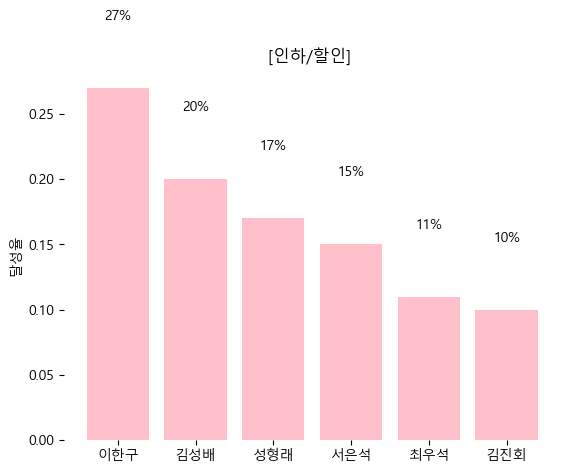

In [13]:
import matplotlib.pyplot as plt

# 'Malgun Gothic'을 사용할 수 있도록 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터를 설정합니다
x = ['이한구', '김성배', '성형래', '서은석', '최우석', '김진회']
y = [0.27, 0.20, 0.17, 0.15, 0.11, 0.10]  # 퍼센트 값을 실수로 변환

# 달성율이 낮은 값을 확인하기 위한 기준 설정
low_achieve = 1.00

# 막대 그래프를 그립니다
bars = plt.bar(x, y, color=['skyblue' if value >= low_achieve else 'pink' for value in y])

# 각 막대에 해당하는 값(달성율)을 표시합니다
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{int(yval*100)}%', ha='center', va='bottom')

# 그래프의 제목과 x, y축 라벨을 설정합니다
plt.title('[인하/할인] ')
plt.xlabel('')
plt.ylabel('달성율')

# 배경선을 제거합니다
plt.box(False)

# 그래프를 보여줍니다
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\sit

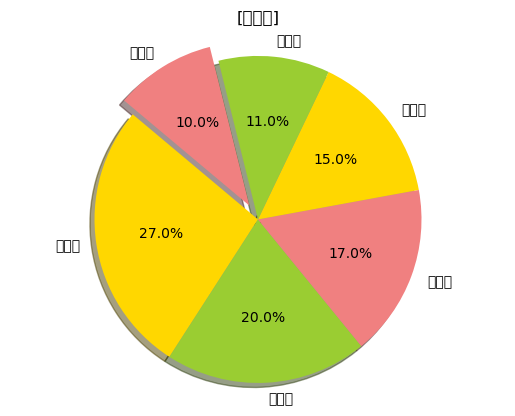

In [2]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '이한구', '김성배', '성형래', '서은석', '최우석', '김진회'
sizes = [27, 20, 17,15,11,10]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0, 0, 0, 0, 0, 0.1)  # 세 번째 조각(강원_권문석)은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('[점유율]')

# 차트 보여주기
plt.show()

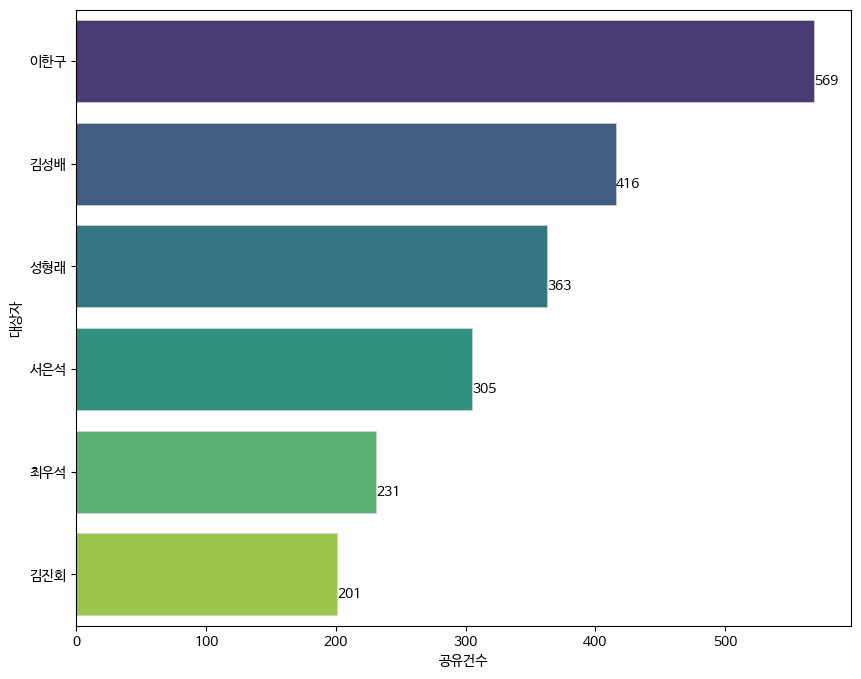

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 생성
data = {
    "구분": ["이한구", "김성배", "성형래", "서은석", "최우석", "김진회"],
    "총합계": [569, 416, 363, 305, 231, 201]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '총합계' 행을 제외
df_filtered = df[df['구분'] != '총합계']

# '총합계' 열 기준으로 내림차순 정렬
df_sorted = df_filtered.sort_values(by='총합계', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='총합계', y='구분', data=df_sorted, palette='viridis', edgecolor='lightgrey', linewidth=0.5)
plt.title('')
plt.xlabel('공유건수')
plt.ylabel('대상자')

# 각 막대에 값 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2. + 0.2, '{:,.0f}'.format(width), ha='left', va='center')

plt.show()

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\

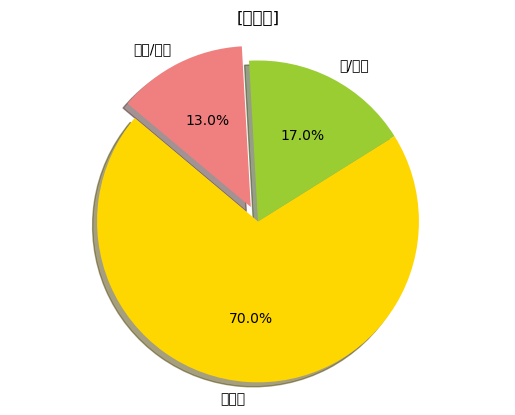

In [1]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = '영업중', '휴/폐업', '취소/정지'
sizes = [0.7, 0.17, 0.13]  # 점유율 데이터
colors = ['gold', 'yellowgreen', 'lightcoral']  # 색상 설정
explode = (0, 0, 0.1)  # 세 번째 조각(강원_권문석)은 돌출

# 원형 차트 생성
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title('[점유율]')

# 차트 보여주기
plt.show()